<img src="https://avatars.githubusercontent.com/u/16632335?v=4" alt="Avatar" style="border-radius: 50%; width: 150px; height: 150px;">

# Projeto 002
by Raul Rodrigues

- **Objetivo**

    1. Qual é o perfil dos clientes em relação à inadimplência com base nas variáveis individuais? REsposta no ponto 1.5.0.0.1 e 1.6.5.0.1
    2. Quais variáveis têm correlação linear e alto Information Value (IV) com a inadimplência? Resposta no ponto 1.7.0.0.1
    3. Quais fatores influenciam diretamente a inadimplência, considerando causalidade entre as variáveis? Resposta no ponto 1.7.0.0.1
    4. Quais medidas a fintech deve adotar para minimizar a inadimplência com base nos fatores de risco identificados? Resposta no ponto 1.7.0.0.1
    
    
> **Aproveitei o projeto para patricar Machine Learning** (item 2. Aplicando Machine Learning)
>    - Regressão Linear (Linear Regression)
>    - Regressão Logísca (Logistic Regression)
>    - Random Forest (Random Forest)
>    - Gradient Boosting 
>    - Redes Neurais (Neural Network)

## Importanto a biblioteca e lendo as tabelas

In [1]:
#Importanto biblotecas necessáris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importando o banco de dados

In [2]:
# Lendo a segunda aba do arquivo Excel e atualizando o DataFrame df
df = pd.read_excel('Base_Inadimplencia.xlsx', sheet_name=1)

In [3]:
# Mostrando 5 linhas aleatórias do DataFrame df
df.sample(5)

,Idade,Sexo,Escolaridade,Tipo_Moradia,Saldo_Investimento,Saldo_Conta_Corrente,Valor_Emprestimo,Duracao_Emprestimo,Inadimplencia
347,23,H,Ensino Medio,Alugada,Alto,Moderado,3758,24,0
761,24,H,Graduacao,Alugada,Pouco,Pouco,2124,18,1
165,32,M,Graduacao,Propria,Alto,Sem conta,2978,6,0
762,24,M,Pos Graduacao,Propria,Pouco,Pouco,2214,12,0
860,27,M,Graduacao,Propria,Alto,Sem conta,5804,24,0


In [4]:
# Retorna o número de linhas e colunas do DataFrame df
df.shape

(1000, 9)

In [5]:
# Mostra informações sobre o DataFrame df, incluindo tipos de dados e contagens de valores não nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Idade                 1000 non-null   int64 
 1   Sexo                  1000 non-null   object
 2   Escolaridade          1000 non-null   object
 3   Tipo_Moradia          1000 non-null   object
 4   Saldo_Investimento    1000 non-null   object
 5   Saldo_Conta_Corrente  1000 non-null   object
 6   Valor_Emprestimo      1000 non-null   int64 
 7   Duracao_Emprestimo    1000 non-null   int64 
 8   Inadimplencia         1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [6]:
# Mostra os valores únicos da coluna 'Inadimplencia' e conta cada valor único
df['Inadimplencia'].value_counts()

0    700
1    300
Name: Inadimplencia, dtype: int64

## Entendendo os dados, utilizando MetaDados

In [7]:
# Lendo a primeira aba (MetaDados) do arquivo Excel e atualizando o DataFrame df_metadados
df_metadados = pd.read_excel('Base_Inadimplencia.xlsx', sheet_name=0)
df_metadados

,Variável,Descrição
0,Idade,Idade do cliente
1,Sexo,H: Homem e M: Mulher
2,Escolaridade,"Medio, Graduação e Pós Graduação;"
3,Tipo_Moradia,"Se mora de favor, paga aluguel ou tem casa pr..."
4,Saldo_Investimento,Se tomador possui alguma conta investimento e...
5,Saldo_Conta_Corrente,Se tomador possui alguma conta corrente em ou...
6,Valor_Emprestimo,valor do empréstimo pessoal solicitado;
7,Duracao_Emprestimo,Duração em meses do empréstimo pessoal solici...
8,Inadimplencia,1 se cliente ficou inadimplente em algum momen...


| Variável              | Descrição                                                                                     |
|-----------------------|------------------------------------------------------------------------------------------------|
| Idade                 | Idade do cliente                                                                               |
| Sexo                  | H: Homem e M: Mulher                                                                           |
| Escolaridade          | Médio, Graduação e Pós Graduação;                                                              |
| Tipo_Moradia          | Se mora de favor, paga aluguel ou tem casa própria;                                            |
| Saldo_Investimento    | Se tomador possui alguma conta investimento em outro banco e qual sua faixa de saldo;          |
| Saldo_Conta_Corrente | Se tomador possui alguma conta corrente em outro banco e qual sua faixa de saldo;              |
| Valor_Emprestimo      | Valor do empréstimo pessoal solicitado;                                                        |
| Duracao_Emprestimo    | Duração em meses do empréstimo pessoal solicitado;                                             |
| Inadimplencia         | 1 se cliente ficou inadimplente em algum momento após o empréstimo ou 0 caso contrário         |


##### **_Insight_**: Planejamento

> Planejamento
- Tipos de variáveis corretos; sem necessidade de transformações (Para facilitar o entendimento Sexo será M: Masculino e F: Feminino)
- Sem valores faltantes.
- Variável alvo: `Inadimplencia` (1=inadimplente, 0=não). Acurácia não é ideal devido ao desbalanceamento (70-30).
- Usaremos Information Value (IV) para avaliar relação com a variável alvo.

## Análise Exploratória

### Iniciar Análise Exploratória/Cleaning/Featuring

In [8]:
# Mostra os valores únicos da coluna 'Inadimplencia' e conta cada valor único
df['Sexo'].value_counts()

M    690
H    310
Name: Sexo, dtype: int64

H: Homem e M: Mulher

In [9]:
# Substituir os valores na coluna 'Sexo' usando o método 'map'
# O dicionário {'H': 'M', 'M': 'F'} é usado para mapear os valores antigos para os novos
df['Sexo'] = df['Sexo'].map({'H': 'M', 'M': 'F'})

In [10]:
# Mostra os valores únicos da coluna 'Inadimplencia' e conta cada valor único
df['Sexo'].value_counts()

F    690
M    310
Name: Sexo, dtype: int64

M: Homem (masculino) e F: Mulher (feminino)

In [11]:
# Retorna estatísticas descritivas para o DataFrame df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Valor_Emprestimo,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duracao_Emprestimo,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Inadimplencia,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0


>**Insight:**
> - Aparentemente não parece haver outliers

In [12]:
# Selecionando variáveis quantitativas (numéricas)
df_quantitativas = df.select_dtypes(include=['number'])

# Selecionando variáveis qualitativas (categóricas)
df_qualitativas = df.select_dtypes(exclude=['number'])

## Variáveis Quantitativas (numéricas)

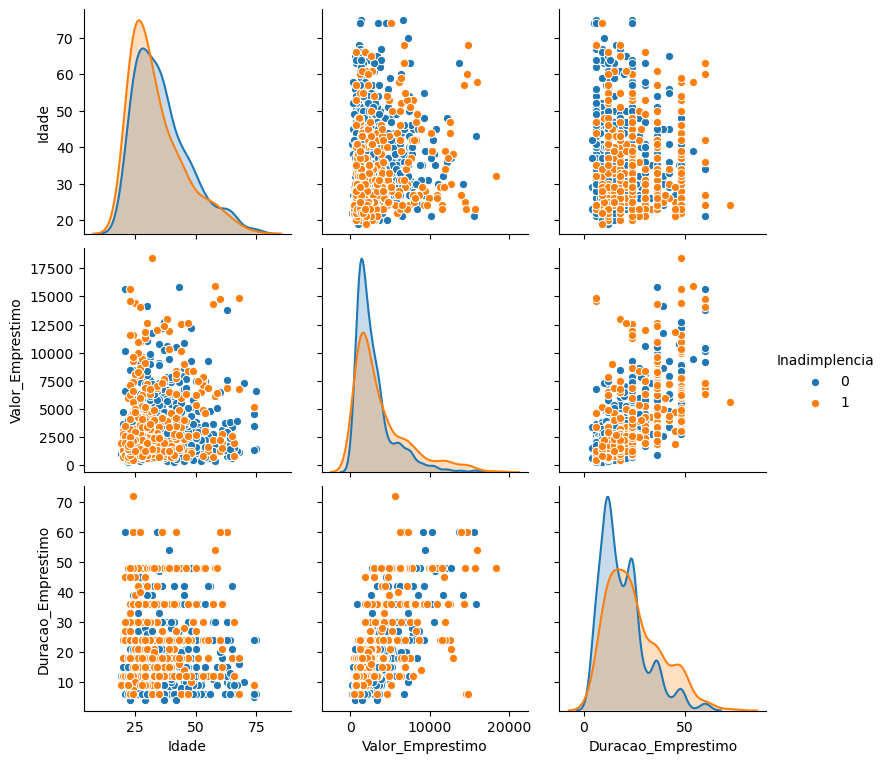

In [13]:
# Criando o pairplot para variáveis numéricas
sns.pairplot(df_quantitativas, hue='Inadimplencia')
plt.show()

##### **_Insigths_**: Variáveis numéricas

> **Variáveis Numéricas**
- **Idade:**  A distribuição de idade parece ser semelhante entre os grupos inadimplentes e não inadimplentes, com uma ligeira tendência a mais inadimplência entre clientes mais jovens.
- **Valor_Emprestimo:** Há uma tendência de maior inadimplência entre clientes com valores de empréstimo mais altos.
- **Duracao_Emprestimo:** Há uma tendência de maior inadimplência entre clientes com duração de emprestimo mais longos.

## Variáveis Qualitativas

### Variável Sexo

In [14]:
# Define a mesma cor azul e laranja usada no pairplot (gráfico acima)
cor_azul = '#1f77b4' # Inadimplencia = 0
cor_laranja = '#ff7f0e' # Inadimplencia = 1

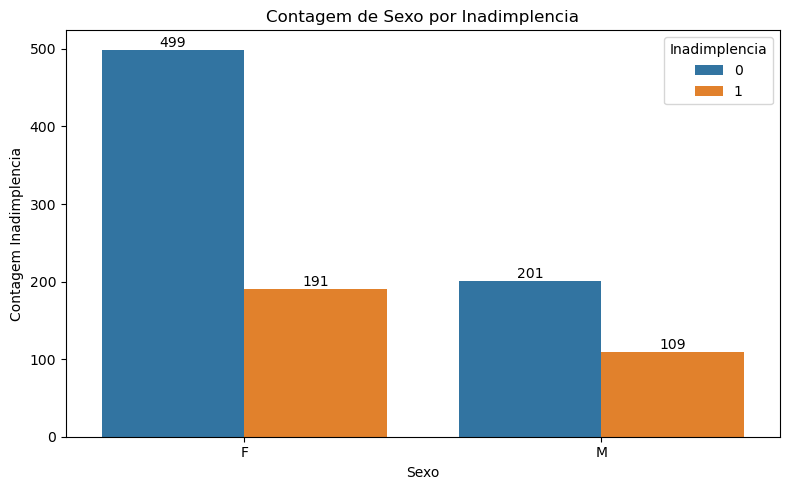

In [15]:
# Loop para criar gráficos de contagem para cada coluna da variável "Sexo"
for col in ['Sexo']:
    plt.figure(figsize=(8, 5))  # Define o tamanho da figura para o gráfico
    ax = sns.countplot(data=df, x=col, hue='Inadimplencia', palette={0: cor_azul, 1: cor_laranja})  # Cria o gráfico de contagem usando seaborn
    
    plt.title(f'Contagem de {col} por Inadimplencia')  # Define o título do gráfico
    plt.xlabel(col)  # Define o rótulo para o eixo x com o nome da coluna atual
    plt.ylabel('Contagem Inadimplencia')  # Define o rótulo para o eixo y como 'Contagem'
    
    # Loop para adicionar contagem acima de cada barra no gráfico
    total = len(df[col])  # Calcula o total de observações na coluna atual
    for p in ax.patches:  # Itera sobre cada barra no gráfico
        x = p.get_x() + p.get_width() / 2  # Posição x para a anotação (centro da barra)
        y = p.get_height()  # Posição y para a anotação (altura da barra)
        ax.annotate(f'{int(y)}', (x, y), ha='center', va='bottom')  # Adiciona a contagem como anotação no gráfico
    
    plt.tight_layout()  # Ajusta o layout do gráfico
    plt.show()  # Exibe o gráfico criado

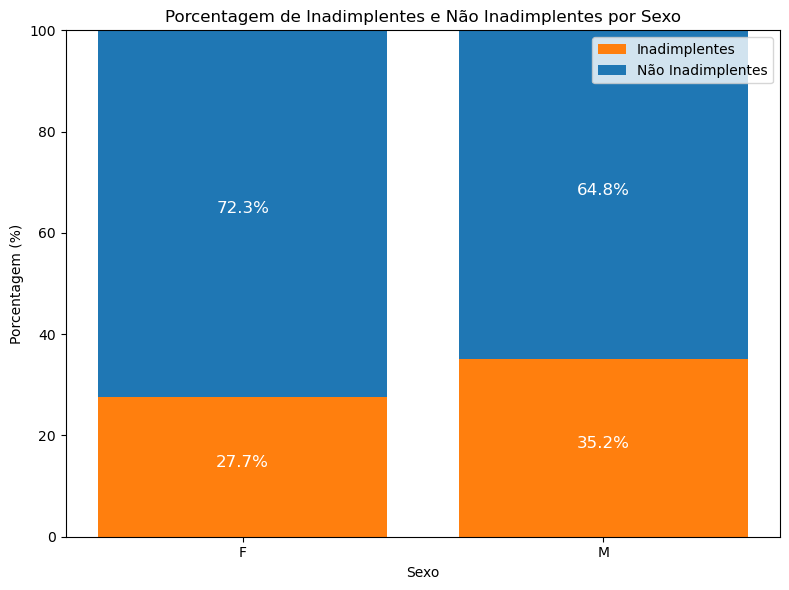

In [16]:
# Criar uma tabela de contingência entre Inadimplencia e Sexo
tabela_contingencia = pd.crosstab(df['Inadimplencia'], df['Sexo'], margins=True)

# Calcula as porcentagens de inadimplentes para cada sexo
percentual_inadimplentes = (tabela_contingencia.loc[1, ['F', 'M']] / tabela_contingencia.loc['All', ['F', 'M']]) * 100

# Calcula as porcentagens de não inadimplentes para cada sexo
percentual_nao_inadimplentes = 100 - percentual_inadimplentes

# Cria o gráfico de barras empilhadas
plt.figure(figsize=(8, 6))  # Define o tamanho da figura do gráfico

# Cria as barras para inadimplentes (laranja) e não inadimplentes (azul)
bars1 = plt.bar(percentual_inadimplentes.index, percentual_inadimplentes, label='Inadimplentes', color=cor_laranja)
bars2 = plt.bar(percentual_nao_inadimplentes.index, percentual_nao_inadimplentes, bottom=percentual_inadimplentes, label='Não Inadimplentes', color=cor_azul)

plt.title('Porcentagem de Inadimplentes e Não Inadimplentes por Sexo')  # Define o título do gráfico
plt.xlabel('Sexo')  # Define o rótulo do eixo x
plt.ylabel('Porcentagem (%)')  # Define o rótulo do eixo y
plt.xticks(rotation=0)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.legend(loc='upper right')  # Adiciona a legenda no canto superior direito
plt.ylim(0, 100)  # Define o limite do eixo y

# Adiciona as porcentagens dentro de cada barra
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height()/2, f'{bar1.get_height():.1f}%', ha='center', color='white' if bar1.get_height() > 50 else 'white', fontsize=12)
    plt.text(bar2.get_x() + bar2.get_width()/2, bar1.get_height() + bar2.get_height()/2, f'{bar2.get_height():.1f}%', ha='center', color='white' if bar2.get_height() > 50 else 'white', fontsize=12)

plt.tight_layout()  # Ajusta o layout do gráfico para evitar sobreposições

# Exibe o gráfico
plt.show()

### Variável Escolaridade

In [17]:
df['Escolaridade'].unique()

array(['Graduacao', 'Pos Graduacao', 'Ensino Medio'], dtype=object)

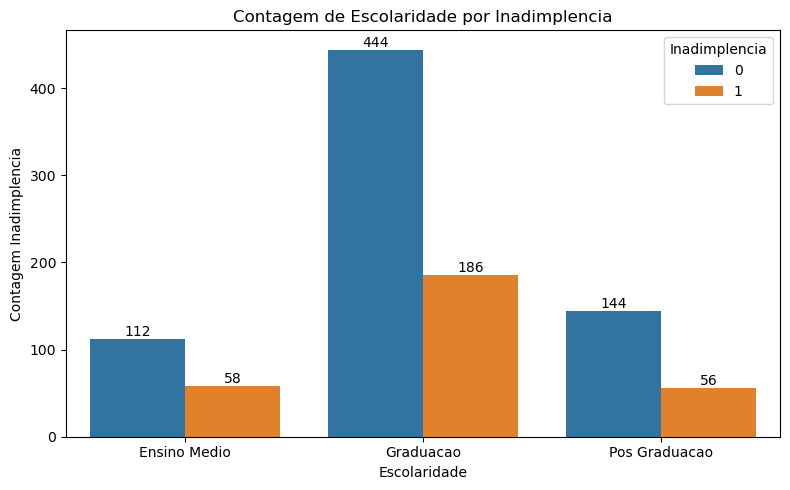

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo as cores
cor_azul = '#1f77b4'  # Inadimplencia = 0
cor_laranja = '#ff7f0e'  # Inadimplencia = 1

# Ordem das categorias
ordem_escolaridade = ['Ensino Medio', 'Graduacao', 'Pos Graduacao']

# Loop para criar gráficos de contagem para a variável "Escolaridade"
plt.figure(figsize=(8, 5))  # Define o tamanho da figura para o gráfico
ax = sns.countplot(data=df, x='Escolaridade', hue='Inadimplencia', palette={0: cor_azul, 1: cor_laranja}, order=ordem_escolaridade)  # Cria o gráfico de contagem usando seaborn

plt.title('Contagem de Escolaridade por Inadimplencia')  # Define o título do gráfico
plt.xlabel('Escolaridade')  # Define o rótulo para o eixo x
plt.ylabel('Contagem Inadimplencia')  # Define o rótulo para o eixo y

# Loop para adicionar contagem acima de cada barra no gráfico
total = len(df['Escolaridade'])  # Calcula o total de observações na coluna "Escolaridade"
for p in ax.patches:  # Itera sobre cada barra no gráfico
    x = p.get_x() + p.get_width() / 2  # Posição x para a anotação (centro da barra)
    y = p.get_height()  # Posição y para a anotação (altura da barra)
    ax.annotate(f'{int(y)}', (x, y), ha='center', va='bottom')  # Adiciona a contagem como anotação no gráfico

plt.tight_layout()  # Ajusta o layout do gráfico
plt.show()  # Exibe o gráfico criado

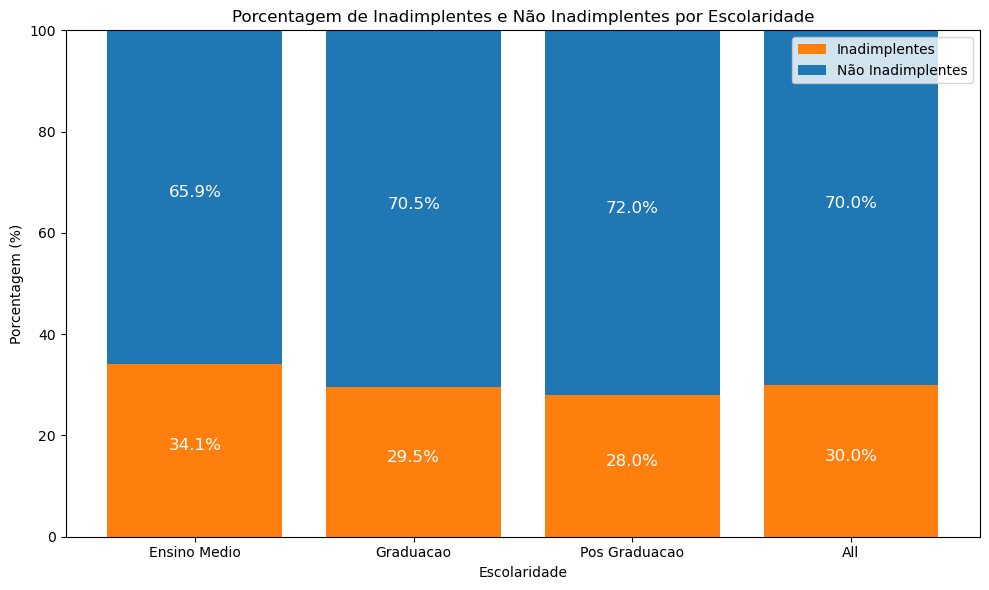

In [19]:
# Criar uma tabela de contingência entre Inadimplencia e Escolaridade
tabela_contingencia = pd.crosstab(df['Inadimplencia'], df['Escolaridade'], margins=True)

# Calcula as porcentagens de inadimplentes para cada categoria de escolaridade
percentual_inadimplentes = (tabela_contingencia.loc[1] / tabela_contingencia.loc['All']) * 100

# Calcula as porcentagens de não inadimplentes para cada categoria de escolaridade
percentual_nao_inadimplentes = 100 - percentual_inadimplentes

# Cria o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura do gráfico

# Cria as barras para inadimplentes (vermelho) e não inadimplentes (azul)
bars1 = plt.bar(percentual_inadimplentes.index, percentual_inadimplentes, label='Inadimplentes', color=cor_laranja)
bars2 = plt.bar(percentual_nao_inadimplentes.index, percentual_nao_inadimplentes, bottom=percentual_inadimplentes, label='Não Inadimplentes', color=cor_azul)

plt.title('Porcentagem de Inadimplentes e Não Inadimplentes por Escolaridade')  # Define o título do gráfico
plt.xlabel('Escolaridade')  # Define o rótulo do eixo x
plt.ylabel('Porcentagem (%)')  # Define o rótulo do eixo y
plt.xticks(rotation=0)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.legend(loc='upper right')  # Adiciona a legenda no canto superior direito
plt.ylim(0, 100)  # Define o limite do eixo y

# Adiciona as porcentagens dentro de cada barra
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height()/2, f'{bar1.get_height():.1f}%', ha='center', color='white', fontsize=12)
    plt.text(bar2.get_x() + bar2.get_width()/2, bar1.get_height() + bar2.get_height()/2, f'{bar2.get_height():.1f}%', ha='center', color='white', fontsize=12)

plt.tight_layout()  # Ajusta o layout do gráfico para evitar sobreposições

# Exibe o gráfico
plt.show()


### Variável Tipo_Moradia

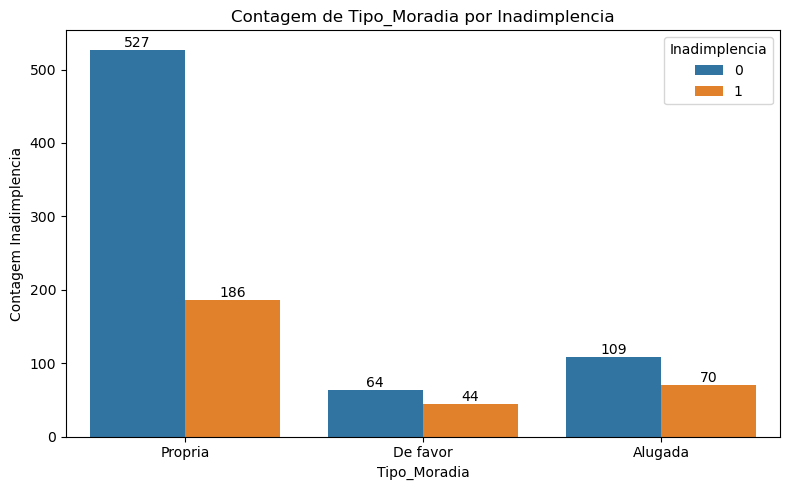

In [20]:
# Loop para criar gráficos de contagem para cada coluna da variável "Tipo_Moradia"
for col in ['Tipo_Moradia']:
    plt.figure(figsize=(8, 5))  # Define o tamanho da figura para o gráfico
    ax = sns.countplot(data=df, x=col, hue='Inadimplencia', palette={0: cor_azul, 1: cor_laranja})  # Cria o gráfico de contagem usando seaborn
    
    plt.title(f'Contagem de {col} por Inadimplencia')  # Define o título do gráfico
    plt.xlabel(col)  # Define o rótulo para o eixo x com o nome da coluna atual
    plt.ylabel('Contagem Inadimplencia')  # Define o rótulo para o eixo y como 'Contagem'
    
    # Loop para adicionar contagem acima de cada barra no gráfico
    total = len(df[col])  # Calcula o total de observações na coluna atual
    for p in ax.patches:  # Itera sobre cada barra no gráfico
        x = p.get_x() + p.get_width() / 2  # Posição x para a anotação (centro da barra)
        y = p.get_height()  # Posição y para a anotação (altura da barra)
        ax.annotate(f'{int(y)}', (x, y), ha='center', va='bottom')  # Adiciona a contagem como anotação no gráfico
    
    plt.tight_layout()  # Ajusta o layout do gráfico
    plt.show()  # Exibe o gráfico criado

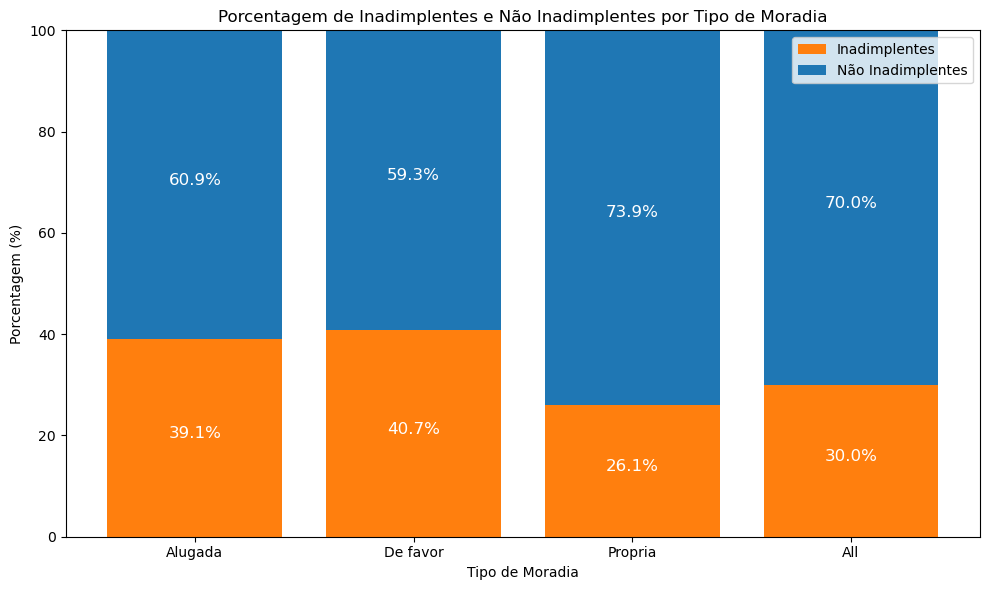

In [21]:
# Criar uma tabela de contingência entre Inadimplencia e Tipo_Moradia
tabela_contingencia = pd.crosstab(df['Inadimplencia'], df['Tipo_Moradia'], margins=True)

# Calcula as porcentagens de inadimplentes para cada categoria de tipo de moradia
percentual_inadimplentes = (tabela_contingencia.loc[1] / tabela_contingencia.loc['All']) * 100

# Calcula as porcentagens de não inadimplentes para cada categoria de tipo de moradia
percentual_nao_inadimplentes = 100 - percentual_inadimplentes

# Cria o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura do gráfico

# Cria as barras para inadimplentes (vermelho) e não inadimplentes (azul)
bars1 = plt.bar(percentual_inadimplentes.index, percentual_inadimplentes, label='Inadimplentes', color=cor_laranja)
bars2 = plt.bar(percentual_nao_inadimplentes.index, percentual_nao_inadimplentes, bottom=percentual_inadimplentes, label='Não Inadimplentes', color=cor_azul)

plt.title('Porcentagem de Inadimplentes e Não Inadimplentes por Tipo de Moradia')  # Define o título do gráfico
plt.xlabel('Tipo de Moradia')  # Define o rótulo do eixo x
plt.ylabel('Porcentagem (%)')  # Define o rótulo do eixo y
plt.xticks(rotation=0)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.legend(loc='upper right')  # Adiciona a legenda no canto superior direito
plt.ylim(0, 100)  # Define o limite do eixo y

# Adiciona as porcentagens dentro de cada barra
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height()/2, f'{bar1.get_height():.1f}%', ha='center', color='white', fontsize=12)
    plt.text(bar2.get_x() + bar2.get_width()/2, bar1.get_height() + bar2.get_height()/2, f'{bar2.get_height():.1f}%', ha='center', color='white', fontsize=12)

plt.tight_layout()  # Ajusta o layout do gráfico para evitar sobreposições

# Exibe o gráfico
plt.show()

### Variável Saldo_Investimento

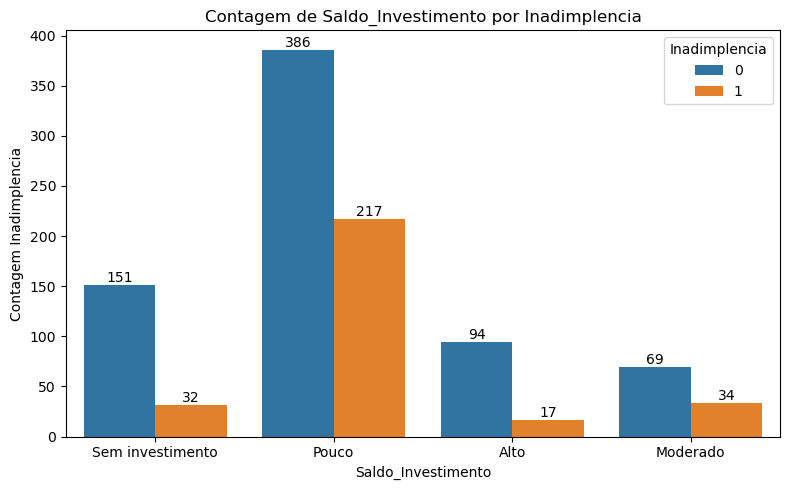

In [22]:
# Loop para criar gráficos de contagem para cada coluna da variável "Saldo_Investimento"
for col in ['Saldo_Investimento']:
    plt.figure(figsize=(8, 5))  # Define o tamanho da figura para o gráfico
    ax = sns.countplot(data=df, x=col, hue='Inadimplencia', palette={0: cor_azul, 1: cor_laranja})  # Cria o gráfico de contagem usando seaborn
    
    plt.title(f'Contagem de {col} por Inadimplencia')  # Define o título do gráfico
    plt.xlabel(col)  # Define o rótulo para o eixo x com o nome da coluna atual
    plt.ylabel('Contagem Inadimplencia')  # Define o rótulo para o eixo y como 'Contagem'
    
    # Loop para adicionar contagem acima de cada barra no gráfico
    total = len(df[col])  # Calcula o total de observações na coluna atual
    for p in ax.patches:  # Itera sobre cada barra no gráfico
        x = p.get_x() + p.get_width() / 2  # Posição x para a anotação (centro da barra)
        y = p.get_height()  # Posição y para a anotação (altura da barra)
        ax.annotate(f'{int(y)}', (x, y), ha='center', va='bottom')  # Adiciona a contagem como anotação no gráfico
    
    plt.tight_layout()  # Ajusta o layout do gráfico
    plt.show()  # Exibe o gráfico criado

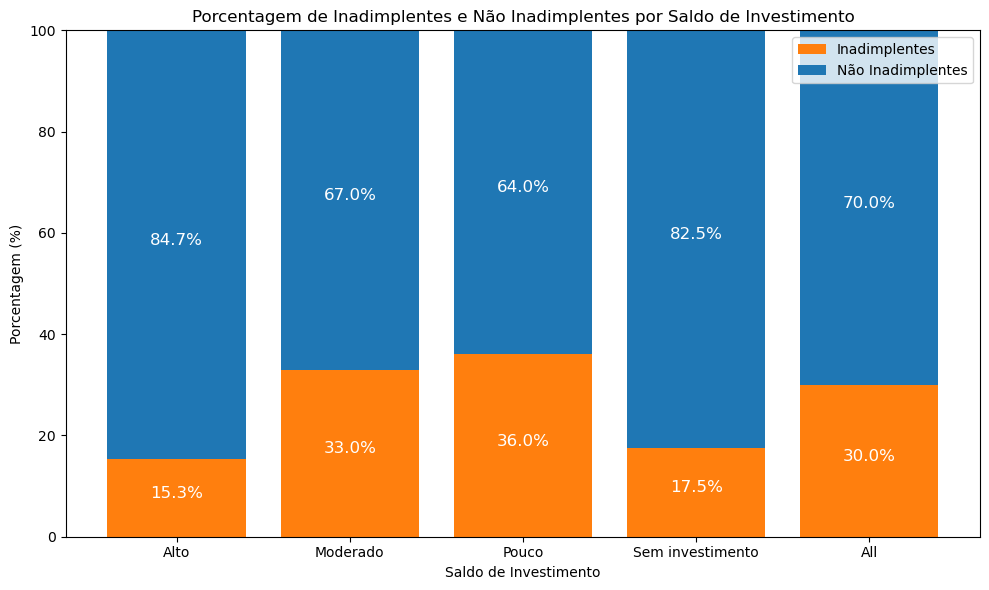

In [23]:
# Criar uma tabela de contingência entre Inadimplencia e Saldo_Investimento
tabela_contingencia = pd.crosstab(df['Inadimplencia'], df['Saldo_Investimento'], margins=True)

# Calcula as porcentagens de inadimplentes para cada categoria de saldo de investimento
percentual_inadimplentes = (tabela_contingencia.loc[1] / tabela_contingencia.loc['All']) * 100

# Calcula as porcentagens de não inadimplentes para cada categoria de saldo de investimento
percentual_nao_inadimplentes = 100 - percentual_inadimplentes

# Cria o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura do gráfico

# Cria as barras para inadimplentes (vermelho) e não inadimplentes (azul)
bars1 = plt.bar(percentual_inadimplentes.index, percentual_inadimplentes, label='Inadimplentes', color=cor_laranja)
bars2 = plt.bar(percentual_nao_inadimplentes.index, percentual_nao_inadimplentes, bottom=percentual_inadimplentes, label='Não Inadimplentes', color=cor_azul)

plt.title('Porcentagem de Inadimplentes e Não Inadimplentes por Saldo de Investimento')  # Define o título do gráfico
plt.xlabel('Saldo de Investimento')  # Define o rótulo do eixo x
plt.ylabel('Porcentagem (%)')  # Define o rótulo do eixo y
plt.xticks(rotation=0)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.legend(loc='upper right')  # Adiciona a legenda no canto superior direito
plt.ylim(0, 100)  # Define o limite do eixo y

# Adiciona as porcentagens dentro de cada barra
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height()/2, f'{bar1.get_height():.1f}%', ha='center', color='white', fontsize=12)
    plt.text(bar2.get_x() + bar2.get_width()/2, bar1.get_height() + bar2.get_height()/2, f'{bar2.get_height():.1f}%', ha='center', color='white', fontsize=12)

plt.tight_layout()  # Ajusta o layout do gráfico para evitar sobreposições

# Exibe o gráfico
plt.show()


### Variável Saldo_Conta_Corrente

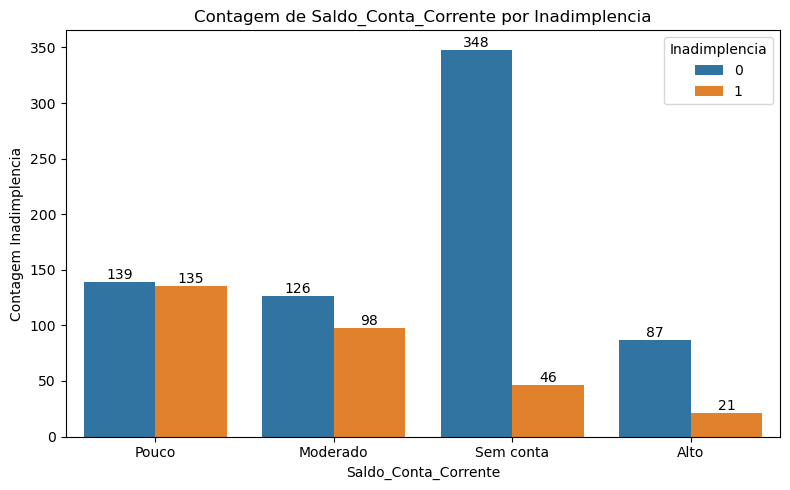

In [24]:
# Loop para criar gráficos de contagem para cada coluna da variável "Saldo_Conta_Corrente"
for col in ['Saldo_Conta_Corrente']:
    plt.figure(figsize=(8, 5))  # Define o tamanho da figura para o gráfico
    ax = sns.countplot(data=df, x=col, hue='Inadimplencia', palette={0: cor_azul, 1: cor_laranja})  # Cria o gráfico de contagem usando seaborn
    
    plt.title(f'Contagem de {col} por Inadimplencia')  # Define o título do gráfico
    plt.xlabel(col)  # Define o rótulo para o eixo x com o nome da coluna atual
    plt.ylabel('Contagem Inadimplencia')  # Define o rótulo para o eixo y como 'Contagem'
    
    # Loop para adicionar contagem acima de cada barra no gráfico
    total = len(df[col])  # Calcula o total de observações na coluna atual
    for p in ax.patches:  # Itera sobre cada barra no gráfico
        x = p.get_x() + p.get_width() / 2  # Posição x para a anotação (centro da barra)
        y = p.get_height()  # Posição y para a anotação (altura da barra)
        ax.annotate(f'{int(y)}', (x, y), ha='center', va='bottom')  # Adiciona a contagem como anotação no gráfico
    
    plt.tight_layout()  # Ajusta o layout do gráfico
    plt.show()  # Exibe o gráfico criado

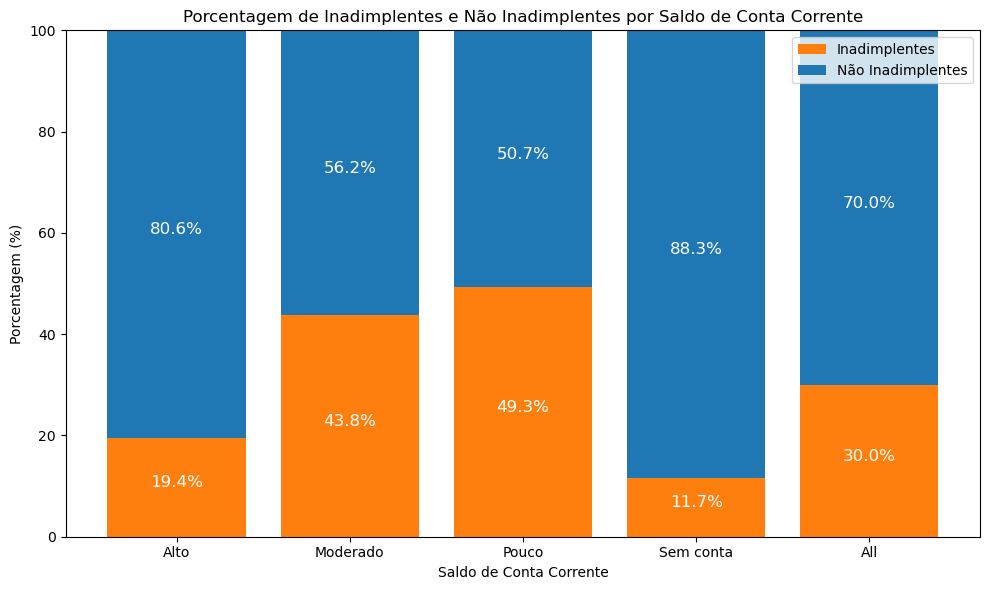

In [25]:
# Criar uma tabela de contingência entre Inadimplencia e Saldo_Conta_Corrente
tabela_contingencia = pd.crosstab(df['Inadimplencia'], df['Saldo_Conta_Corrente'], margins=True)

# Calcula as porcentagens de inadimplentes para cada categoria de saldo de conta corrente
percentual_inadimplentes = (tabela_contingencia.loc[1] / tabela_contingencia.loc['All']) * 100

# Calcula as porcentagens de não inadimplentes para cada categoria de saldo de conta corrente
percentual_nao_inadimplentes = 100 - percentual_inadimplentes

# Cria o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura do gráfico

# Cria as barras para inadimplentes (vermelho) e não inadimplentes (azul)
bars1 = plt.bar(percentual_inadimplentes.index, percentual_inadimplentes, label='Inadimplentes', color=cor_laranja)
bars2 = plt.bar(percentual_nao_inadimplentes.index, percentual_nao_inadimplentes, bottom=percentual_inadimplentes, label='Não Inadimplentes', color=cor_azul)

plt.title('Porcentagem de Inadimplentes e Não Inadimplentes por Saldo de Conta Corrente')  # Define o título do gráfico
plt.xlabel('Saldo de Conta Corrente')  # Define o rótulo do eixo x
plt.ylabel('Porcentagem (%)')  # Define o rótulo do eixo y
plt.xticks(rotation=0)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.legend(loc='upper right')  # Adiciona a legenda no canto superior direito
plt.ylim(0, 100)  # Define o limite do eixo y

# Adiciona as porcentagens dentro de cada barra
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height()/2, f'{bar1.get_height():.1f}%', ha='center', color='white', fontsize=12)
    plt.text(bar2.get_x() + bar2.get_width()/2, bar1.get_height() + bar2.get_height()/2, f'{bar2.get_height():.1f}%', ha='center', color='white', fontsize=12)

plt.tight_layout()  # Ajusta o layout do gráfico para evitar sobreposições

# Exibe o gráfico
plt.show()

In [26]:
# Imprimir dados do saldo de conta corrente
print("Porcentagem de Inadimplentes por Saldo de Conta Corrente:")
print(percentual_inadimplentes)

print("\nPorcentagem de Não Inadimplentes por Saldo de Conta Corrente:")
print(percentual_nao_inadimplentes)

Porcentagem de Inadimplentes por Saldo de Conta Corrente:
Saldo_Conta_Corrente
Alto         19.444444
Moderado     43.750000
Pouco        49.270073
Sem conta    11.675127
All          30.000000
dtype: float64

Porcentagem de Não Inadimplentes por Saldo de Conta Corrente:
Saldo_Conta_Corrente
Alto         80.555556
Moderado     56.250000
Pouco        50.729927
Sem conta    88.324873
All          70.000000
dtype: float64


##### **_Insight_**: Variáveis Categóricas

> **Variáveis Categóricas:**
- **Sexo:** Enquanto o número total de mulheres inadimplentes é maior, representando 27,7% dos casos, os homens têm uma taxa de inadimplência significativamente maior, com 35,2%. Esta diferença destaca uma correlação entre o sexo e a inadimplência.
- **Escolaridade:** A categoria de "Graduação" apresenta a maior taxa de inadimplência, seguida por "Ensino Médio". Por outro lado, os clientes com "Pós-Graduação" demonstram a menor incidência de inadimplência.
- **Tipo de Moradia:** Clientes que residem em imóveis alugados ou cedidos apresentam taxas de inadimplência mais altas em comparação àqueles que possuem imóveis próprios.
- **Saldo de Investimento:** Embora o grupo com "Pouco Investimento" tenha o maior número absoluto de inadimplentes, quando consideramos por categoria, os indivíduos com "Pouco Investimento" têm a maior taxa de inadimplência, enquanto aqueles com "Alto Investimento" apresentam a menor.
- **Saldo de Conta Corrente:** Surpreendentemente, clientes sem conta corrente representam a maior proporção de não inadimplentes, porém analisando por categorias, os clientes com "Pouco Saldo Corrente" têm a maior porcentagem de inadimplência.

## Information Value

In [27]:
def calculate_iv(data, target, bins=10):
    """Calcula o Valor de Informação (IV) para cada variável independente em relação à variável dependente."""
    
    # DataFrame para armazenar os resultados do IV
    iv_df = pd.DataFrame()
    
    # Loop para calcular o IV de cada variável independente
    for ivar in data.columns.drop(target):
        # Lógica de binning
        if data[ivar].nunique() > 10:
            binned_x = pd.qcut(data[ivar], bins, duplicates='drop')
        else:
            binned_x = data[ivar]
        
        # Cria DataFrame com variável e alvo binados
        d = pd.DataFrame({'Variável': binned_x, 'Alvo': data[target]})
        
        # Agrupa e calcula estatísticas
        d = d.groupby('Variável')['Alvo'].agg(['count', 'sum']).reset_index()
        d.columns = ['Corte', 'N', 'Eventos']
        
        # Calcula WoE e IV
        d['% de Eventos'] = d['Eventos'] / d['Eventos'].sum()
        d['% de Não-Eventos'] = (d['N'] - d['Eventos']) / (d['N'] - d['Eventos']).sum()
        d['WoE'] = np.log(d['% de Eventos'] / d['% de Não-Eventos'])
        d['IV'] = d['WoE'] * (d['% de Eventos'] - d['% de Não-Eventos'])
        
        # Calcula IV total e adiciona ao DataFrame final
        iv = d['IV'].sum()
        iv_df = iv_df.append({'Variável': ivar, 'IV': iv}, ignore_index=True)
    
    # Função para categorizar o poder de separação
    def categorize_separation_power(iv):
        if iv < 0.02:
            return "Muito Fraco"
        elif iv < 0.1:
            return "Fraco"
        elif iv < 0.3:
            return "Médio"
        elif iv < 0.5:
            return "Forte"
        else:
            return "Muito Forte (Verificar!)"
    
    # Adiciona a categoria de poder de separação
    iv_df['Poder de Separação'] = iv_df['IV'].apply(categorize_separation_power)
    
    # Ordena por IV (decrescente)
    iv_df = iv_df.sort_values(by='IV', ascending=False).reset_index(drop=True)
    
    return iv_df

In [28]:
# Example usage (replace 'classif' with your actual target variable)
ranking = calculate_iv(data=df, target='Inadimplencia')
ranking

,IV,Variável,Poder de Separação
0,0.728680,Saldo_Conta_Corrente,Muito Forte (Verificar!)
1,0.246542,Duracao_Emprestimo,Médio
2,0.192473,Saldo_Investimento,Médio
3,0.113637,Valor_Emprestimo,Médio
4,0.100622,Idade,Médio
5,0.083293,Tipo_Moradia,Fraco
6,0.026543,Sexo,Fraco
7,0.008484,Escolaridade,Muito Fraco


##### **_Insight_**: Information Value

> **2. Quais variáveis têm correlação linear e alto Information Value (IV) com a inadimplência?**

O Valor de Informação (IV) é uma métrica que avalia a capacidade preditiva de variáveis em relação à variável alvo. Vamos utilizar as variáveis com maior IV, que indicam uma relação mais forte com 'Inadimplencia', para nossos modelos.

**Variáveis Selecionadas:**
- Saldo_Conta_Corrente (IV: 0.729): (REANALISANDO O GRÁFICO) A análise detalhada revela que clientes com 'Pouco' saldo em conta corrente apresentam uma inadimplência de 49.3%, enquanto aqueles com 'Alto' saldo mostram uma taxa de 19.4%. Considerando que a inadimplência geral é de 30%, fica evidente a significativa influência dessa categoria na inadimplência. O Valor de Informação (IV) confirma e reforça as conclusões da análise exploratória inicial, destacando a importância dessa variável para nossos modelos preditivos.
- Duracao_Emprestimo (IV: 0.247)
- Saldo_Investimento (IV: 0.192)
- Valor_Emprestimo (IV: 0.114)
- Idade (IV: 0.101)

> **3. Quais fatores influenciam diretamente a inadimplência, considerando causalidade entre as variáveis?**

Vide Ranking Information Value

##### **_Insight_**: Saldo de Conta Corrente

> **4. Quais medidas a fintech deve adotar para minimizar a inadimplência com base nos fatores de risco identificados?**

1. Medidas para Minimizar a Inadimplência com Base no Saldo da Conta Corrente

- **Segmentação de Clientes:** Dividir os clientes em grupos com base em seus saldos na conta corrente e direcionar estratégias de gerenciamento de risco específicas para cada segmento. Por exemplo, clientes com saldos mais baixos podem receber limites de crédito mais restritos ou serem submetidos a verificações de crédito mais rigorosas.
   
- **Ofertas Personalizadas:** Oferecer produtos ou serviços personalizados para clientes com saldos mais baixos na conta corrente, como opções de crédito com taxas de juros mais baixas ou planos de pagamento flexíveis, para incentivá-los a manter seus pagamentos em dia.

- **Alertas de Saldo Baixo:** Implementar um sistema de alerta automático para clientes com saldo baixo na conta corrente, informando-os sobre sua situação financeira e sugerindo ações preventivas, como transferências de fundos ou ajustes no orçamento.

- **Programas de Incentivo:** Criar programas de incentivo que recompensem os clientes por manterem saldos mais altos em suas contas correntes, como cashbacks, descontos ou benefícios exclusivos, para motivá-los a melhorar sua saúde financeira.

- **Educação Financeira:** Desenvolver materiais educativos específicos sobre a importância de manter um saldo saudável na conta corrente e como isso pode influenciar sua capacidade de acessar crédito e evitar a inadimplência.

- **Análise Proativa:** Realizar análises proativas dos clientes com saldos baixos na conta corrente para identificar sinais de potencial inadimplência e intervir rapidamente com soluções personalizadas, como renegociação de dívidas ou opções de pagamento alternativas.

## Explorar mais a Variável Duração_Empréstimo

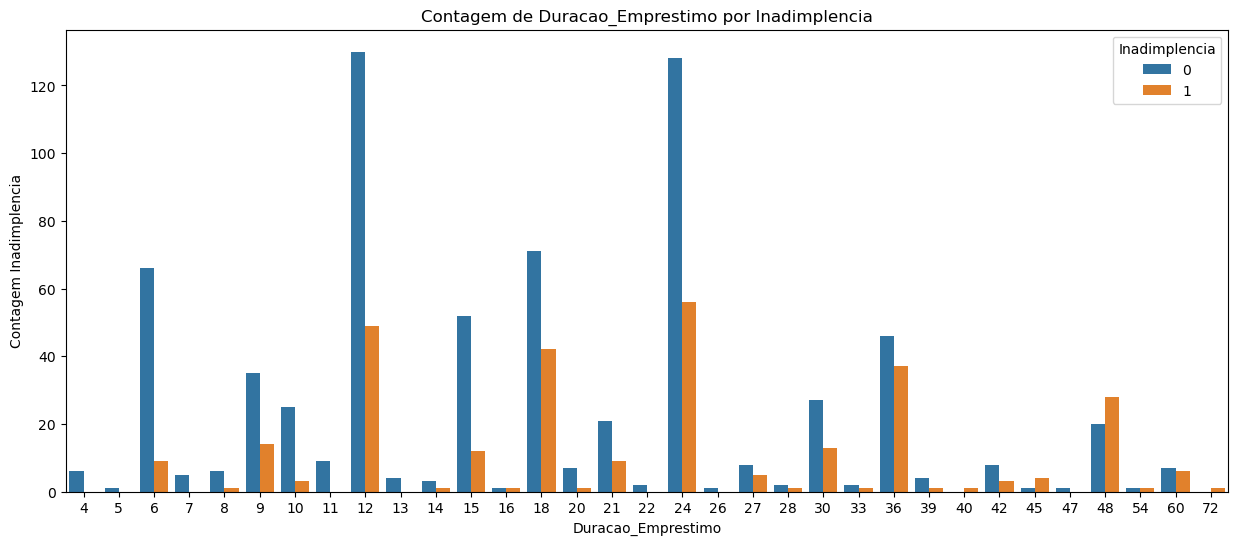

In [29]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 6))

# Ordena os valores únicos de 'Duracao_Emprestimo'
order = sorted(df['Duracao_Emprestimo'].unique())

# Cria um gráfico de contagem para Duracao_Emprestimo com distinção por Inadimplencia
ax = sns.countplot(data=df, x='Duracao_Emprestimo', hue='Inadimplencia', palette={0: cor_azul, 1: cor_laranja}, order=order)

# Define o título e os rótulos dos eixos
plt.title('Contagem de Duracao_Emprestimo por Inadimplencia')
plt.xlabel('Duracao_Emprestimo')
plt.ylabel('Contagem Inadimplencia')

# Exibe o gráfico
plt.show()

In [30]:
# Criação da Tabela de Contingência entre Inadimplência e Duração do Empréstimo
tabela_contingencia_duracao = pd.crosstab(df['Inadimplencia'], df['Duracao_Emprestimo'], margins=True)

# Cálculo da Porcentagem de Inadimplentes por Categoria de Duração do Empréstimo
percentual_inadimplentes_duracao = (tabela_contingencia_duracao.loc[1] / tabela_contingencia_duracao.loc['All']) * 100

# Cálculo da Porcentagem de Não Inadimplentes por Categoria de Duração do Empréstimo
percentual_nao_inadimplentes_duracao = 100 - percentual_inadimplentes_duracao

# Criar DataFrame consolidado
df_percentual_duracao = pd.DataFrame({
    'Inadimplentes (%)': percentual_inadimplentes_duracao,
    'Não Inadimplentes (%)': percentual_nao_inadimplentes_duracao
}).sort_values(by='Inadimplentes (%)', ascending=False)

# Impressão da Tabela Consolidada
print("### Análise de Inadimplência e Não Inadimplência por Duração de Empréstimo ###\n")
print(df_percentual_duracao)

### Análise de Inadimplência e Não Inadimplência por Duração de Empréstimo ###

                    Inadimplentes (%)  Não Inadimplentes (%)
Duracao_Emprestimo                                          
72                         100.000000               0.000000
40                         100.000000               0.000000
45                          80.000000              20.000000
48                          58.333333              41.666667
54                          50.000000              50.000000
16                          50.000000              50.000000
60                          46.153846              53.846154
36                          44.578313              55.421687
27                          38.461538              61.538462
18                          37.168142              62.831858
33                          33.333333              66.666667
28                          33.333333              66.666667
30                          32.500000              67.500000
24   

##### **_Insight_**: Duração de Empréstimo

2. Medidas para Minimizar a Inadimplência com Base na **Duração de Empréstimo** ###

- **Revisão de Política de Empréstimo de Longo Prazo:** 
  - Reduzir ou limitar a oferta de empréstimos com durações de 72, 40 e 45 meses, pois apresentam 100% de inadimplência.
  - Uma forma mais fácil de abordagem é reduzir ou limitar empréstimos acima de 40 meses, ou aumentar a taxa de juros de forma gradativa
  
- **Incentivos para Empréstimos de Curto Prazo:**
  - Empréstimos com duração de 6 a 20 meses apresentam menor inadimplência, variando de 12% a 28.57%. A fintech poderia oferecer incentivos, como taxas de juros mais baixas ou condições de pagamento flexíveis, para promover empréstimos de curto prazo.

- **Educação Financeira para Clientes de Alto Risco:**
  - Começar a fornecer materiais educativos e workshops para clientes que optam por empréstimos de longo prazo, ajudando-os a entender os riscos associados e a gerenciar suas finanças de forma responsável.
  - Posteriormente expandindo para todos que adquiriem algum empréstimo, independentemente da duração de prazo

# Aplicando Machine Learning

### Definindo funções para calculo de métricas

In [31]:
# # Bibliotecas para as métricas
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score  # Métricas de avaliação
from scipy.stats import ks_2samp  # Teste de Kolmogorov-Smirnov

In [32]:
# Métricas paara Regressão Linear
def avalia_linear(modelo, x_train, y_train, x_test, y_test):
    # Cálculo dos valores preditos
    ypred_train = modelo.predict(x_train)  # Previsões para o conjunto de treinamento
    ypred_test = modelo.predict(x_test)  # Previsões para o conjunto de teste

    # Métricas de Desempenho
    mse_train = mean_squared_error(y_train, ypred_train)  # MSE para o conjunto de treinamento
    mse_test = mean_squared_error(y_test, ypred_test)  # MSE para o conjunto de teste

    mae_train = mean_absolute_error(y_train, ypred_train)  # MAE para o conjunto de treinamento
    mae_test = mean_absolute_error(y_test, ypred_test)  # MAE para o conjunto de teste

    r2_train = r2_score(y_train, ypred_train)  # R-Squared para o conjunto de treinamento
    r2_test = r2_score(y_test, ypred_test)  # R-Squared para o conjunto de teste

    # Criação do DataFrame com as métricas de desempenho
    df_desemp = pd.DataFrame({'Treino':[mse_train, mae_train, r2_train],
                              'Teste':[mse_test, mae_test, r2_test]},
                            index=['MSE','MAE','R-Squared'])

    return df_desemp

In [33]:
# Função para cálculo do KS (Kolmogorov-Smirnov statistic)
def ks_stat(y, y_pred):
    # Calcula a estatística KS comparando os valores preditos para os grupos de inadimplentes (y==1) e adimplentes (y!=1)
    return ks_2samp(y_pred[y==1], y_pred[y!=1]).statistic

In [34]:
# Função para cálculo do desempenho de modelos
def calcula_desempenho(modelo, x_train, y_train, x_test, y_test):
    
    # Cálculo dos valores preditos
    ypred_train = modelo.predict(x_train)  # Previsões para o conjunto de treinamento
    ypred_proba_train = modelo.predict_proba(x_train)[:,1]  # Probabilidades para o conjunto de treinamento
    
    ypred_test = modelo.predict(x_test)  # Previsões para o conjunto de teste
    ypred_proba_test = modelo.predict_proba(x_test)[:,1]  # Probabilidades para o conjunto de teste
    
    # Métricas de Desempenho
    acc_train = accuracy_score(y_train, ypred_train) * 100  # Acurácia para o conjunto de treinamento
    acc_test = accuracy_score(y_test, ypred_test) * 100  # Acurácia para o conjunto de teste
    
    roc_train = roc_auc_score(y_train, ypred_proba_train) * 100  # AUROC para o conjunto de treinamento
    roc_test = roc_auc_score(y_test, ypred_proba_test) * 100  # AUROC para o conjunto de teste

    ks_train = ks_stat(y_train, ypred_proba_train) * 100  # Estatística KS para o conjunto de treinamento
    ks_test = ks_stat(y_test, ypred_proba_test) * 100  # Estatística KS para o conjunto de teste

    prec_train = precision_score(y_train, ypred_train, zero_division=0) * 100  # Precisão para o conjunto de treinamento
    prec_test = precision_score(y_test, ypred_test, zero_division=0) * 100  # Precisão para o conjunto de teste

    recl_train = recall_score(y_train, ypred_train) * 100  # Recall para o conjunto de treinamento
    recl_test = recall_score(y_test, ypred_test) * 100  # Recall para o conjunto de teste

    f1_train = f1_score(y_train, ypred_train) * 100  # Score F1 para o conjunto de treinamento
    f1_test = f1_score(y_test, ypred_test) * 100  # Score F1 para o conjunto de teste

    # Criação do DataFrame com as métricas de desempenho
    df_desemp = pd.DataFrame({'Treino':[acc_train, roc_train, ks_train, 
                                        prec_train, recl_train, f1_train],
                              'Teste':[acc_test, roc_test, ks_test,
                                       prec_test, recl_test, f1_test]},
                            index=['Acurácia','AUROC','KS',
                                   'Precision','Recall','F1'])

    # Adiciona uma coluna para a diferença entre treinamento e teste
    df_desemp['Diferença'] = df_desemp['Teste'] - df_desemp['Treino']
  
    return df_desemp

## Regressão Linear (Revisar e reforçar conhecimento)

In [35]:
# Bibliotecas básicas
import pandas as pd
import numpy as np

# Regressão Linear
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import itertools

# Pacotes de modelagem
import statsmodels.api as sm

# Bibliotecas para tempo e barra de progresso
import time
from tqdm import tqdm

In [36]:
# Lendo a segunda aba do arquivo Excel e atualizando o DataFrame df
df = pd.read_excel('Base_Inadimplencia.xlsx', sheet_name=1)

In [37]:
target = df['Inadimplencia']

In [38]:
# Seleciona todas as variáveis numéricas e qualitativas
X_numericas = df.select_dtypes(include=['number']).drop('Inadimplencia', axis=1)
X_qualitativas = df.select_dtypes(include=['object'])

In [39]:
# Codificação get_dummies para variáveis qualitativas
X_qualitativas_cod = pd.get_dummies(X_qualitativas, drop_first=True)

In [40]:
# Concatena variáveis numéricas e qualitativas codificadas
X_full = pd.concat([X_numericas, X_qualitativas_cod], axis=1)

In [ ]:
## Começar a contar o tempo
start_time = time.time()

# Gera todas as combinações possíveis de variáveis
combinations = []
for r in range(1, len(X_full.columns) + 1):
	combinations.extend(itertools.combinations(X_full.columns, r))

# Cria uma tabela para armazenar os resultados
results = []

# Loop para cada combinação com barra de progresso
for combo in tqdm(combinations):
	X_combo = X_full[list(combo)]
	model = sm.OLS(target, X_combo).fit() # Parâmetro guardado mas não utilziado
	coeficientes = model.params # Coeficientes das variáveis para posterior interpretação
	adj_r_squared = model.rsquared_adj * 100 # R-quadrado ajustado
	results.append((combo, adj_r_squared, model.aic, coeficientes))
    

# Cria um DataFrame com os resultados
df_results = pd.DataFrame(results, columns=['Combinação', 'R-quadrado Ajustado', 'AIC', 'Coeficientes'])

# Ordena os resultados por Rsquared em ordem decrescente
df_results.sort_values(by='R-quadrado Ajustado', ascending=False, inplace=True)

# Arruma tabela resultado sem Coeficientes
table_results = df_results.drop(columns=['Coeficientes'])

# Mostra os resultados
display(table_results)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

100%|███████████████████████████████████████████████████████████████████████████| 16383/16383 [00:26<00:00, 622.65it/s]


,Combinação,R-quadrado Ajustado,AIC
14811,"(Duracao_Emprestimo, Sexo_M, Tipo_Moradia_Prop...",42.784343,1084.520913
15746,"(Valor_Emprestimo, Duracao_Emprestimo, Sexo_M,...",42.767147,1085.811827
12618,"(Duracao_Emprestimo, Sexo_M, Tipo_Moradia_Prop...",42.756744,1084.011735
13905,"(Idade, Duracao_Emprestimo, Sexo_M, Tipo_Morad...",42.755029,1085.033121
15526,"(Idade, Duracao_Emprestimo, Sexo_M, Tipo_Morad...",42.745246,1086.194422
...,...,...,...
94,"(Saldo_Investimento_Moderado, Saldo_Conta_Corr...",4.514661,1589.704794
8,"(Saldo_Investimento_Moderado,)",3.644745,1597.775509
101,"(Saldo_Investimento_Sem investimento, Saldo_Co...",2.476006,1610.830514
10,"(Saldo_Investimento_Sem investimento,)",1.766976,1617.076023


Elapsed time: 26.34 seconds


In [ ]:
# Seleciona a melhor combinação com base no Rsquared
best_combo = df_results.loc[df_results['R-quadrado Ajustado'].idxmax()]

# Mostra a melhor combinação
print("Melhor combinação:")
print(best_combo['Combinação'])

# Mostra o R-quadrado ajustado e AIC da melhor combinação
print(f"\nR-quadrado Ajustado: {best_combo['R-quadrado Ajustado']:.2f}")
print(f"\nAIC: {best_combo['AIC']:.2f}")

# Mostra os coeficientes da melhor combinação
print("\nCoeficientes:")
print(best_combo['Coeficientes'])

Melhor combinação:
('Duracao_Emprestimo', 'Sexo_M', 'Tipo_Moradia_Propria', 'Saldo_Investimento_Moderado', 'Saldo_Investimento_Pouco', 'Saldo_Investimento_Sem investimento', 'Saldo_Conta_Corrente_Moderado', 'Saldo_Conta_Corrente_Pouco', 'Saldo_Conta_Corrente_Sem conta')

R-quadrado Ajustado: 42.78

AIC: 1084.52

Coeficientes:
Duracao_Emprestimo                     0.007829
Sexo_M                                -0.062129
Tipo_Moradia_Propria                  -0.057638
Saldo_Investimento_Moderado            0.114680
Saldo_Investimento_Pouco               0.137345
Saldo_Investimento_Sem investimento    0.063071
Saldo_Conta_Corrente_Moderado          0.228167
Saldo_Conta_Corrente_Pouco             0.282102
Saldo_Conta_Corrente_Sem conta        -0.044937
dtype: float64


### CONCLUSÃO: Interpretação do R² Ajustado

In [ ]:
best_combo['Coeficientes']

Duracao_Emprestimo                     0.007829
Sexo_M                                -0.062129
Tipo_Moradia_Propria                  -0.057638
Saldo_Investimento_Moderado            0.114680
Saldo_Investimento_Pouco               0.137345
Saldo_Investimento_Sem investimento    0.063071
Saldo_Conta_Corrente_Moderado          0.228167
Saldo_Conta_Corrente_Pouco             0.282102
Saldo_Conta_Corrente_Sem conta        -0.044937
dtype: float64

In [ ]:
model.params

Idade                                 -0.000762
Valor_Emprestimo                       0.000006
Duracao_Emprestimo                     0.006953
Sexo_M                                -0.061323
Escolaridade_Graduacao                 0.026354
Escolaridade_Pos Graduacao             0.025148
Tipo_Moradia_De favor                  0.010475
Tipo_Moradia_Propria                  -0.051997
Saldo_Investimento_Moderado            0.112373
Saldo_Investimento_Pouco               0.136191
Saldo_Investimento_Sem investimento    0.060111
Saldo_Conta_Corrente_Moderado          0.224495
Saldo_Conta_Corrente_Pouco             0.281176
Saldo_Conta_Corrente_Sem conta        -0.046319
dtype: float64

In [ ]:
### Somar as variáveis Dummie e realizar a contagem por variável
# Gera os coeficientes do modelo
coeficientes = best_combo['Coeficientes']

# Cria um dicionário para armazenar os coeficientes originais
coeficientes_original = {}

# Pegar as colunas dropadas no processo de criação de variáveis dummy
colunas_dropadas = [col for col in df.columns if col not in X_full.columns]

# Loop through each coefficient
for nome_variavel, valor_coeficiente in coeficientes.items():
	# Verificar se a variável é dummy
	for coluna_dropada in colunas_dropadas:
		if nome_variavel.startswith(coluna_dropada):
			# Somar os coeficientes da variável original
			coeficientes_original[coluna_dropada] = coeficientes_original.get(coluna_dropada, 0) + valor_coeficiente
	
	# Verificar se a variável está em df_quantitativas
	if nome_variavel in df_quantitativas.columns:
		# Acrescentar ao dicionário
		coeficientes_original[nome_variavel] = valor_coeficiente


# Mostra os coeficientes originais
if coeficientes_original:
	for nome_variavel, valor_coeficiente in coeficientes_original.items():
		print(f"{nome_variavel}: {valor_coeficiente * 100:.2f}%")
else:
	print("Nenhum coeficiente original encontrado.")

Duracao_Emprestimo: 0.78%
Sexo: -6.21%
Tipo_Moradia: -5.76%
Saldo_Investimento: 31.51%
Saldo_Conta_Corrente: 46.53%


In [ ]:
# Criando a mensagem explicativa
mensagem = f"O modelo de Regressão Linear explica aproximadamente {adj_r_squared:.2f}% da variabilidade na variável alvo."

# Imprimir o resultado
print(mensagem)

O modelo de Regressão Linear explica aproximadamente 42.59% da variabilidade na variável alvo.


In [ ]:
# Interpretar o nome do coeficiente baseado no índice
def interpretar_nome_coeficiente(indice, nome_variavel):
    # Se o índice for 0, retorna "Intercepto"
    if indice == 0:
        return 'Intercepto'
    # Caso contrário, retorna o nome da variável
    else:
        return nome_variavel

# Interpretar o valor do coeficiente
def interpretar_valor_coeficiente(indice, nome_variavel, valor_coeficiente):
    # Se o índice for 0, retorna a mensagem "Variável Target: valor_coeficiente"
    if indice == 0:
        return f"Variável Target: {valor_coeficiente:.6f}"
    # Caso contrário, retorna a mensagem com o nome do coeficiente e o valor multiplicado por 100
    else:
        return f"{interpretar_nome_coeficiente(indice, nome_variavel)}: Cada unidade adicional gera um aumento médio de {valor_coeficiente*100:.6f}%"

# Lista para armazenar a interpretação de cada coeficiente
interpretacoes_coeficientes = []

# Loop sobre cada coeficiente
for indice, (nome_variavel, valor_coeficiente) in enumerate(coeficientes.items()):
    # Chama a função para interpretar o valor do coeficiente
    interpretacao = interpretar_valor_coeficiente(indice, nome_variavel, valor_coeficiente)
    # Adiciona a interpretação à lista
    interpretacoes_coeficientes.append(interpretacao)

# Imprimir o resultado
print('\n'.join(interpretacoes_coeficientes))

Variável Target: 0.007829
Sexo_M: Cada unidade adicional gera um aumento médio de -6.212923%
Tipo_Moradia_Propria: Cada unidade adicional gera um aumento médio de -5.763817%
Saldo_Investimento_Moderado: Cada unidade adicional gera um aumento médio de 11.467969%
Saldo_Investimento_Pouco: Cada unidade adicional gera um aumento médio de 13.734542%
Saldo_Investimento_Sem investimento: Cada unidade adicional gera um aumento médio de 6.307075%
Saldo_Conta_Corrente_Moderado: Cada unidade adicional gera um aumento médio de 22.816690%
Saldo_Conta_Corrente_Pouco: Cada unidade adicional gera um aumento médio de 28.210176%
Saldo_Conta_Corrente_Sem conta: Cada unidade adicional gera um aumento médio de -4.493733%


In [ ]:
### ATENÇÃO
### Repensar se essa interpretação ajuda, pois como a variável Sexo_M ela responde
### menos que a Sexo_F, portando, a variável Sexo ajuda a responder.


# Interpretar o nome do coeficiente baseado no índice
def interpretar_nome_coeficiente(indice, nome_variavel):
    return 'Intercepto' if indice == 0 else nome_variavel

# Interpretar o valor do coeficiente
def interpretar_valor_coeficiente(indice, nome_variavel, valor_coeficiente):
    return f"Variável Target: {valor_coeficiente:.6f}" if indice == 0 else f"{nome_variavel}: Cada unidade adicional gera um aumento médio de {valor_coeficiente*100:.6f}%"

# Gera os coeficientes do melhor combo
coeficientes = best_combo['Coeficientes']

# Cria um dicionário para armazenar os coeficientes originais
coeficientes_original = {}

# Pegar as colunas dropadas no processo de criação de variáveis dummy
colunas_dropadas = [col for col in df.columns if col not in X_full.columns]

# Loop through each coefficient
for nome_variavel, valor_coeficiente in coeficientes.items():
    for coluna_dropada in colunas_dropadas:
        if nome_variavel.startswith(coluna_dropada):
            coeficientes_original[df.columns[df.columns.get_loc(coluna_dropada)]] = coeficientes_original.get(df.columns[df.columns.get_loc(coluna_dropada)], 0) + valor_coeficiente*100

# Mostra os coeficientes originais
if coeficientes_original:
    for nome_variavel, valor_coeficiente in coeficientes_original.items():
        print(f"{nome_variavel}: {valor_coeficiente:.2f}%")
else:
    print("Nenhum coeficiente original encontrado.")

Sexo: -6.21%
Tipo_Moradia: -5.76%
Saldo_Investimento: 31.51%
Saldo_Conta_Corrente: 46.53%


In [ ]:
# Select the columns from X_full using the best_combo['Combinação'] list
X_selected = X_full[list(best_combo['Combinação'])]

# Fit the linear regression model
modelo = sm.OLS(target, X_selected)

In [ ]:
# Ajusta o modelo aos dados
resultado = modelo.fit()

In [ ]:
# Resultado do Ajuste do Modelo de Regressão Linear
# Imprime um resumo estatístico do resultado do ajuste do modelo
print(resultado.summary())

                                 OLS Regression Results                                
Dep. Variable:          Inadimplencia   R-squared (uncentered):                   0.433
Model:                            OLS   Adj. R-squared (uncentered):              0.428
Method:                 Least Squares   F-statistic:                              84.09
Date:                Thu, 25 Apr 2024   Prob (F-statistic):                   1.02e-115
Time:                        14:34:42   Log-Likelihood:                         -533.26
No. Observations:                1000   AIC:                                      1085.
Df Residuals:                     991   BIC:                                      1129.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

> ##### REGRESSÃO LINEAR: Não é um bom modelo para explicar as variáveis, pois existem variáveis com coeficientes negativos, bem como o P valor está acima dos 5% o que é necessário rejeitar.

## Regressão Logística (Revisar e reforçar conhecimento)

In [ ]:
# Bibliotecas necessárias
import pandas as pd  # Biblioteca para manipulação de dados
import numpy as np  # Biblioteca para cálculos numéricos
import matplotlib.pyplot as plt  # Biblioteca para visualização de dados
import seaborn as sns  # Biblioteca para visualização de dados

# Regressão Logística
from sklearn.linear_model import LogisticRegression  # Modelo de Regressão Logística
from sklearn.preprocessing import StandardScaler  # Escalonamento de dados
from sklearn.model_selection import train_test_split  # Divisão de conjuntos de treinamento e teste
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score  # Métricas de avaliação
from scipy.stats import ks_2samp  # Teste de Kolmogorov-Smirnov

In [ ]:
# Carregando dados da 2ª aba do arquivo Excel para o DataFrame df
df = pd.read_excel('Base_Inadimplencia.xlsx', sheet_name=1)  # Lendo a segunda aba do arquivo Excel

In [ ]:
# Selecionando variáveis quantitativas (numéricas)
df_quantitativas = df.select_dtypes(include=['number'])

# Selecionando variáveis qualitativas (categóricas)
df_qualitativas = df.select_dtypes(exclude=['number'])

In [ ]:
# Criando variáveis dummy para as variáveis qualitativas
df_final = pd.get_dummies(df, columns=df_qualitativas.columns, drop_first=True)

In [ ]:
# Verificar quais colunas foram dropadas, para ter como referência na Regressão Logística
for col in df.select_dtypes(include=['object']).columns:
    # Cria variáveis dummy para a coluna atual
    dummies = pd.get_dummies(df, columns=[col], drop_first=True)
    # Identifica a coluna dropada (primeira variável dummy)
    droped_column = dummies.columns[dummies.columns.str.startswith(f'{col}_')][0]
    # Imprime o nome da coluna dropada
    print(f"Coluna dropada: {droped_column}")

Coluna dropada: Sexo_M
Coluna dropada: Escolaridade_Graduacao
Coluna dropada: Tipo_Moradia_De favor
Coluna dropada: Saldo_Investimento_Moderado
Coluna dropada: Saldo_Conta_Corrente_Moderado


In [ ]:
# X e y para Regressão Logística
X_logistic = df_final.drop('Inadimplencia', axis=1)  # Todas as variáveis em formato dummy
y_logistic = df_final['Inadimplencia']  # Variável resposta (target variable)

In [ ]:
# Divisão dos dados em treinamento e teste (80% treinamento, 20% teste)
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=777)

# Criação do modelo Regressão Logística
logistic_model = LogisticRegression(random_state=777, max_iter=1000, solver='newton-cg')  # Definindo parâmetros do modelo

# Treinamento do modelo com os dados de treinamento
logistic_model.fit(X_train_logistic, y_train_logistic)  # Treinando o modelo

LogisticRegression(max_iter=1000, random_state=777, solver='newton-cg')

### Entendendo as Métricas de Desempenho

#### Acurácia (Accuracy)
A acurácia é como um "nota" para o modelo, mostrando quantas vezes ele acertou as previsões em comparação com o total de previsões feitas.

#### AUROC (Area Under the Receiver Operating Characteristic Curve)
A AUROC é uma nota que mostra quão bem o modelo consegue dizer se algo é positivo ou negativo. Um valor próximo de 1 é ótimo, e 0,5 é como chutar ao acaso.

#### Estatística KS (Kolmogorov-Smirnov Statistic)
A Estatística KS é outra nota que vê o quanto o modelo consegue separar coisas positivas das negativas. Um número alto é bom, mostra que o modelo entende bem a diferença.

#### Precisão (Precision)
A precisão é como um "grau de certeza" do modelo quando ele diz que algo é positivo. É uma medida de confiabilidade.

#### Recall (Sensibilidade)
O recall mostra quantas coisas positivas o modelo conseguiu acertar em relação ao total de coisas positivas reais. É uma medida de quão atento o modelo é para coisas positivas.

#### F1 Score
O F1 Score é uma nota que combina a precisão e o recall. É como um "média" que mostra o equilíbrio entre acertar as coisas certas e não perder as coisas importantes.

#### Variação
A variação compara como o modelo se saiu no treino e no teste. Uma variação positiva é boa, significa que o modelo está indo melhor no teste. Uma variação negativa é um sinal para ficar de olho.

In [ ]:
# Imprime o título das métricas
print('\nMétricas da Regressão Logística:')

# Calcula as métricas para o modelo de Regressão Logística
# Passa o modelo, dados de treinamento e teste, e variáveis target
metricas_logistic = calcula_desempenho(
	logistic_model, 
	X_train_logistic, 
	y_train_logistic, 
	X_test_logistic, 
	y_test_logistic
)

# Formata a exibição de números flutuantes em DataFrames do pandas
# Mostra como porcentagem com 2 casas decimais
pd.options.display.float_format = '{:.2f}%'.format

# Exibe as métricas calculadas
metricas_logistic


Métricas da Regressão Logística:


,Treino,Teste,Diferença
Acurácia,75.38%,73.00%,-2.38%
AUROC,78.69%,70.20%,-8.49%
KS,46.28%,33.38%,-12.89%
Precision,64.20%,48.65%,-15.56%
Recall,45.75%,33.96%,-11.79%
F1,53.43%,40.00%,-13.43%


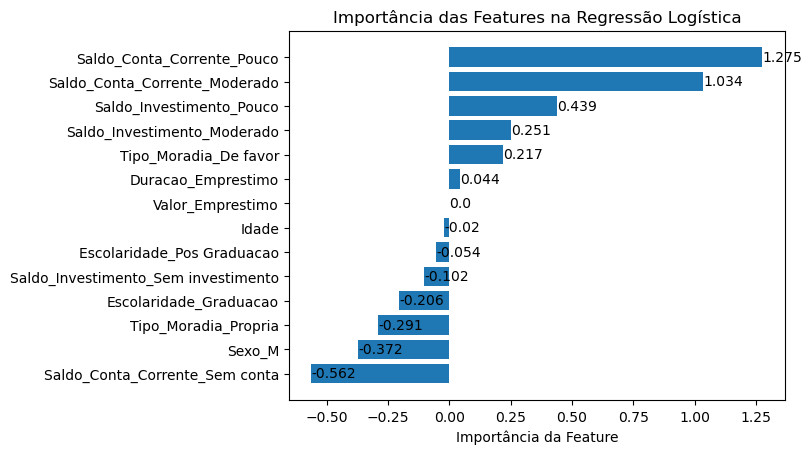

In [ ]:
# Obtenha os coeficientes do modelo Logistic Regression
feat_importances_logistic = logistic_model.coef_[0]

# Obtenha os nomes das features
feat_names_logistic = X_train_logistic.columns

# Ordene as importâncias das features em ordem decrescente
sorted_indices_logistic = feat_importances_logistic.argsort()
feat_importances_logistic = feat_importances_logistic[sorted_indices_logistic]
feat_names_logistic = feat_names_logistic[sorted_indices_logistic]

# Tamanho no gráfico
#plt.figure(figsize=(12, 8))  

# Plote o gráfico de barras horizontais com as importâncias das features
plt.barh(range(len(feat_names_logistic)), feat_importances_logistic)
# Adicione os nomes das features no eixo y
plt.yticks(range(len(feat_names_logistic)), feat_names_logistic)
# Adicione o rótulo do eixo x
plt.xlabel('Importância da Feature')
# Adicione o título do gráfico
plt.title('Importância das Features na Regressão Logística')

# Adicione os valores de importância das features como rótulos no gráfico
for i, importance in enumerate(feat_importances_logistic):
	plt.text(importance, i, str(importance.round(3)), ha='left', va='center')

# Exibe o gráfico
plt.show()

In [ ]:
# Obtenção dos coeficientes do modelo
print('Intercepto: {}'.format(logistic_model.intercept_))  # Imprime o valor do intercepto do modelo
print('Coeficientes: {}'.format(logistic_model.coef_))  # Imprime os coeficientes das variáveis independentes

Intercepto: [-1.30364926]
Coeficientes: [[-1.99873123e-02  1.53274769e-06  4.35433525e-02 -3.71896302e-01
  -2.05585796e-01 -5.38632494e-02  2.17067251e-01 -2.90960080e-01
   2.50540300e-01  4.39145436e-01 -1.02297514e-01  1.03373484e+00
   1.27547063e+00 -5.62397425e-01]]


#### Entendo o que esses Coeficientes representam

In [ ]:
target = df['Inadimplencia']
median_target = target.mean()

In [ ]:
# Obtenção dos coeficientes do modelo
print('Valor do Intercepto: {}'.format(logistic_model.intercept_))
print('O intercepto representa o log-odds da variável target quando todas as variáveis independentes são iguais a zero. Em outras palavras, é o ponto de partida do modelo.')

# Cálculo da probabilidade a partir do intercepto
intercepto = logistic_model.intercept_[0]  # Obtenção do valor do intercepto
probabilidade = 1 / (1 + np.exp(-intercepto))  # Cálculo da probabilidade

# Print da média de Inadimplência
print(f'\nMédia de Inadimplência antes da Regressão Logística: {median_target*100:.2f}%')

# Print da probabilidade de Inadimplência após aplicar a regressão logística
print(f'Probabilidade de Inadimplência após Regressão Logística: {probabilidade*100:.2f}%\n')

# Classificação do resultado
if probabilidade < median_target:
    melhoria = (probabilidade - median_target) * 100
    print(f'Resultado: Bom! Houve uma melhoria de {melhoria:.2f}% na probabilidade de Inadimplência após aplicar a regressão logística.')
elif probabilidade == median_target:
    print('Resultado: Neutro! A probabilidade de Inadimplência permaneceu igual após aplicar a regressão logística.')
else:
    piora = (median_target - probabilidade) * 100
    print(f'Resultado: Ruim! Houve um aumento de {piora:.2f}% na probabilidade de Inadimplência após aplicar a regressão logística.')

Valor do Intercepto: [-1.30364926]
O intercepto representa o log-odds da variável target quando todas as variáveis independentes são iguais a zero. Em outras palavras, é o ponto de partida do modelo.

Média de Inadimplência antes da Regressão Logística: 30.00%
Probabilidade de Inadimplência após Regressão Logística: 21.36%

Resultado: Bom! Houve uma melhoria de -8.64% na probabilidade de Inadimplência após aplicar a regressão logística.


In [ ]:
##### Análise de Variáveis Numéricas (Quantitativas) #####
# Esta seção analisa as variáveis numéricas e seus coeficientes na regressão logística.
# Aqui, estamos verificando como cada variável numérica afeta a probabilidade de 
# ser do tipo y_logistica (targer)
# Os resultados são exibidos em um DataFrame e em formato de texto para melhor compreensão.
# Em resumo, essa seção mostra como as variáveis numéricas influenciam na probabilidade 
# de um resultado específico.

# Crie uma lista para armazenar os resultados
numeric_results = []

# Loop pelas colunas numéricas do DataFrame
for column in df.select_dtypes(include=['number']).columns:
    # Obtenha os coeficientes da regressão logística
    coefficients = logistic_model.coef_[0]
    # Loop pelas variáveis e seus coeficientes
    for coefficient, variable in zip(coefficients, X_logistic.columns):
        # Verifique se a variável é igual à coluna atual
        if variable == column:
            # Formate a porcentagem com duas casas decimais
            coefficient_percent = '{:.2f}%'.format(coefficient*100)
            # Adicione a variável e seu coeficiente à lista de resultados
            numeric_results.append((variable, coefficient_percent))

# Crie um DataFrame a partir da lista de resultados
df_numeric_results = pd.DataFrame(numeric_results, columns=['Variável', 'Coeficiente (%)'])

# Exiba o DataFrame
display(df_numeric_results)
print("============================================")
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    coefficients = logistic_model.coef_[0]
    for coefficient, variable in zip(coefficients, X_logistic.columns):
        if variable == column:
            if coefficient > 0.001:
                print(f"\n- O coeficiente de {variable} é positivo, indicando que um aumento de 1 unidade em {variable} resulta em um aumento de {coefficient*100:.2f}% na probabilidade de ser do tipo {y_logistic.name}")
            elif coefficient < -0.001:
                print(f"\n- O coeficiente de {variable} é negativo, indicando que um aumento de 1 unidade em {variable} resulta em uma diminuição de {-coefficient*100:.2f}% na probabilidade de ser do tipo {y_logistic.name}")
            else:
                print(f"\n- O coeficiente de {variable} é zero, indicando que não há efeito na probabilidade de ser do tipo {y_logistic.name}")

,Variável,Coeficiente (%)
0,Idade,-2.00%
1,Valor_Emprestimo,0.00%
2,Duracao_Emprestimo,4.35%



- O coeficiente de Idade é negativo, indicando que um aumento de 1 unidade em Idade resulta em uma diminuição de 2.00% na probabilidade de ser do tipo Inadimplencia

- O coeficiente de Valor_Emprestimo é zero, indicando que não há efeito na probabilidade de ser do tipo Inadimplencia

- O coeficiente de Duracao_Emprestimo é positivo, indicando que um aumento de 1 unidade em Duracao_Emprestimo resulta em um aumento de 4.35% na probabilidade de ser do tipo Inadimplencia


In [ ]:
##### Análise de Variáveis Catégóricas (Qualitativas) #####
# Este código analisa os coeficientes da regressão logística e exibe os resultados
# em um DataFrame e em formato de texto. Ele mostra os coeficientes das variáveis
# categóricas (qualitativas) em porcentagem, indicando quais delas têm um impacto
# significativo (aumento ou diminuição) na probabilidade de ser do tipo y_logistica.
# Em outras palavras, ele ajuda a identificar quais variáveis qualitativas são mais
# importantes para prever o tipo y_logistica (target)

##### Análise de Variáveis Catégóricas (Qualitativas) #####
print("VARIÁVEIS CATEGÓRICAS (Qualitativas)")

# Função para processar coeficientes de variáveis categóricas
def process_coeficients(coefs, columns, results):
    for coef, var in zip(coefs, columns):
        if var.startswith(col):
            results.append((var, coef * 100))

# Cria DataFrame com resultados
results = []
for col in df.select_dtypes(exclude=['number']).columns:
    coefs = logistic_model.coef_[0]
    process_coeficients(coefs, X_logistic.columns, results)


df_results = pd.DataFrame(results, columns=['Variável', 'Coeficiente (%)'])
print(df_results.sort_values(by='Coeficiente (%)', ascending=False))
print("============================================")

# Função para processar coeficientes de variáveis objeto
results = []
for col in df.select_dtypes(include=['object']).columns:
    dummies = pd.get_dummies(df, columns=[col], drop_first=False)
    droped_column = dummies.columns[dummies.columns.str.startswith(f'{col}_')][0]
    coefs = logistic_model.coef_[0]
    for coef, var in zip(coefs, X_logistic.columns):
        if var.startswith(f'{col}_'):
            if coef > 0.01:
                results.append((coef, f"\n- A presença da categoria {var} em relação à {droped_column} aumenta em {coef * 100:.2f}% a probabilidade de ser do tipo {y_logistic.name}"))
            elif coef < - 0.01:
                results.append((coef, f"\n- A presença da categoria {var} em relação à {droped_column} diminui em {-coef * 100:.2f}% a probabilidade de ser do tipo {y_logistic.name}"))
            else:
                results.append((coef, f"\n- A presença da categoria {var} em relação à {droped_column} não tem efeito na probabilidade de ser do tipo {y_logistic.name}"))

# Ordena e imprime os resultados
results.sort(reverse=True)
for coef, result in results:
    print(result)

VARIÁVEIS CATEGÓRICAS (Qualitativas)
                               Variável  Coeficiente (%)
9            Saldo_Conta_Corrente_Pouco          127.55%
8         Saldo_Conta_Corrente_Moderado          103.37%
6              Saldo_Investimento_Pouco           43.91%
5           Saldo_Investimento_Moderado           25.05%
3                 Tipo_Moradia_De favor           21.71%
2            Escolaridade_Pos Graduacao           -5.39%
7   Saldo_Investimento_Sem investimento          -10.23%
1                Escolaridade_Graduacao          -20.56%
4                  Tipo_Moradia_Propria          -29.10%
0                                Sexo_M          -37.19%
10       Saldo_Conta_Corrente_Sem conta          -56.24%

- A presença da categoria Saldo_Conta_Corrente_Pouco em relação à Saldo_Conta_Corrente_Alto aumenta em 127.55% a probabilidade de ser do tipo Inadimplencia

- A presença da categoria Saldo_Conta_Corrente_Moderado em relação à Saldo_Conta_Corrente_Alto aumenta em 103.37% a proba

> ##### REGRESSÃO LOGÍSTICA: Se saiu bem melhor em responder as variáveis.

## Random Forest (Revisar e reforçar conhecimento)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into features (X) and target (y)
X_random_forest = df_final.drop('Inadimplencia', axis=1)  # All dummy variables
y_random_forest = df_final['Inadimplencia']  # Target variable

# Split data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_random_forest, y_random_forest, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
rf = RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 50)
rf.fit(X_train_rf, y_train_rf)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test_rf)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test_rf, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy:.3f}')

Random Forest Accuracy: 0.760


In [67]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid to search
param_grid_rf = {
    'n_estimators': [10, 50, 100, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 5],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize the GridSearchCV object
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=777), param_grid_rf, cv=5, scoring='roc_auc')

# Start the timer
start_time_rf = time.time()

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(X_train_rf, y_train_rf)

# End the timer
end_time_rf = time.time()

# Calculate the elapsed time
elapsed_time_rf = end_time_rf - start_time_rf

# Get the best hyperparameters and the corresponding accuracy
best_params_rf = grid_search_rf.best_params_
best_scoring_rf = grid_search_rf.best_score_

print(f'Best Hyperparameters: {best_params_rf}')
print(f'Best Scoring: {best_scoring_rf:.3f}')
print(f'Elapsed Time: {elapsed_time_rf:.2f} seconds')

Best Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}
Best Scoring: 0.757
Elapsed Time: 233.87 seconds


In [68]:
best_params_rf = grid_search_rf.best_params_
best_scoring_rf = grid_search_rf.best_score_

In [69]:
# Crie um novo objeto RandomForestClassifier com os melhores 
# hiperparâmetros encontrados pela busca em grid

best_rf = RandomForestClassifier(**best_params_rf)

# Treine o modelo nos dados de treinamento usando os melhores hiperparâmetros
best_rf.fit(X_train_rf, y_train_rf)

## OBS: Os parametros que NÃO apareceram abaixo é que já são padrão do Random Forest

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50)

In [70]:
# Chama a função para calcular as métricas de desempenho
df_desemp_rf = calcula_desempenho(best_rf, X_train_rf, y_train_rf, X_test_rf, y_test_rf)

# Mostra a tabela com as métricas de desempenho
display(df_desemp_rf)

,Treino,Teste,Diferença
Acurácia,83.38%,75.00%,-8.38%
AUROC,90.32%,80.21%,-10.10%
KS,63.32%,47.66%,-15.65%
Precision,86.00%,64.52%,-21.48%
Recall,53.53%,33.90%,-19.63%
F1,65.98%,44.44%,-21.54%


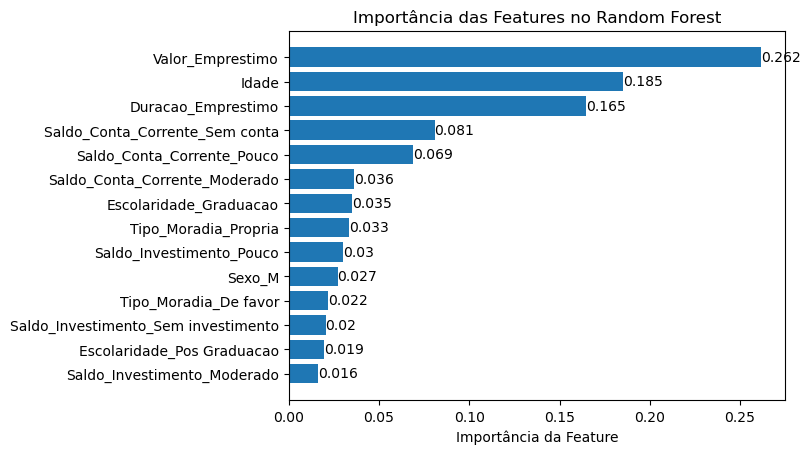

In [71]:
# Obtenha as importâncias das features do modelo Random Forest
feat_importances_rf = rf.feature_importances_
# Obtenha os nomes das features
feat_names_rf = X_train_rf.columns

# Ordene as importâncias das features em ordem decrescente
sorted_indices_rf = feat_importances_rf.argsort()
feat_importances_rf = feat_importances_rf[sorted_indices_rf]
feat_names_rf = feat_names_rf[sorted_indices_rf]

# Tamanho no gráfico
#plt.figure(figsize=(12, 8))  

# Plote o gráfico de barras horizontais com as importâncias das features
plt.barh(range(len(feat_names_rf)), feat_importances_rf)
# Adicione os nomes das features no eixo y
plt.yticks(range(len(feat_names_rf)), feat_names_rf)
# Adicione o rótulo do eixo x
plt.xlabel('Importância da Feature')
# Adicione o título do gráfico
plt.title('Importância das Features no Random Forest')

# Adicione os valores de importância das features como rótulos no gráfico
for i, importance in enumerate(feat_importances_rf):
	plt.text(importance, i, str(importance.round(3)), ha='left', va='center')

# Exibe o gráfico
plt.show()

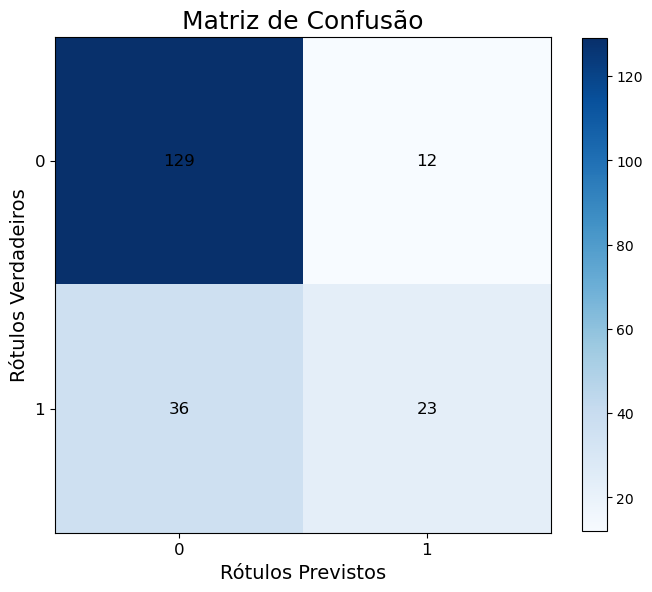

In [72]:
from sklearn.metrics import confusion_matrix

# Calcule a matriz de confusão
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)

# Crie um objeto figura e eixo
fig, ax = plt.subplots(figsize=(8, 8))

# Plote a matriz de confusão como uma imagem
ax.imshow(cm_rf, interpolation='nearest', cmap='Blues')

# Adicione um título e labels
ax.set_title('Matriz de Confusão', fontsize=18)
ax.set_xlabel('Rótulos Previstos', fontsize=14)
ax.set_ylabel('Rótulos Verdadeiros', fontsize=14)

# Adicione marcas de tick e labels para os eixos x e y
marcas_de_tick_rf = np.arange(len(np.unique(y_test_rf)))
ax.set_xticks(marcas_de_tick_rf)
ax.set_yticks(marcas_de_tick_rf)
ax.set_xticklabels(np.unique(y_test_rf), fontsize=12)
ax.set_yticklabels(np.unique(y_test_rf), fontsize=12)

# Adicione os valores à matriz de confusão
for i, j in np.ndindex(cm_rf.shape):
	ax.text(j, i, cm_rf[i, j], ha='center', va='center', color='black', fontsize=12)

# Adicione uma barra de cores
fig.colorbar(ax.imshow(cm_rf, interpolation='nearest', cmap='Blues'), ax=ax, shrink=0.8)

# Mostre o plot
plt.show()

In [73]:
from sklearn.metrics import confusion_matrix

def explicar_matriz_confusao(cm):
 texto = "Explicação da Matriz de Confusão:\n\n"
 texto += "A matriz de confusão mostra como nosso modelo previu os resultados reais.\n"
 texto += "Aqui está o que cada número significa:\n\n"
 texto += "Verdadeiros Positivos (VP): {} - Estes são os casos em que nosso modelo previu corretamente um resultado positivo (ex.: real positivo e previsto positivo).\n".format(cm[0,0])
 texto += "Verdadeiros Negativos (VN): {} - Estes são os casos em que nosso modelo previu corretamente um resultado negativo (ex.: real negativo e previsto negativo).\n".format(cm[1,1])
 texto += "Falsos Positivos (FP): {} - Estes são os casos em que nosso modelo previu incorretamente um resultado positivo (ex.: real negativo mas previsto positivo).\n".format(cm[0,1])
 texto += "Falsos Negativos (FN): {} - Estes são os casos em que nosso modelo previu incorretamente um resultado negativo (ex.: real positivo mas previsto negativo).\n".format(cm[1,0])
 return texto

In [74]:
# Chamando a função explicação Matriz Confusão para RF
print(explicar_matriz_confusao(cm_rf))

Explicação da Matriz de Confusão:

A matriz de confusão mostra como nosso modelo previu os resultados reais.
Aqui está o que cada número significa:

Verdadeiros Positivos (VP): 129 - Estes são os casos em que nosso modelo previu corretamente um resultado positivo (ex.: real positivo e previsto positivo).
Verdadeiros Negativos (VN): 23 - Estes são os casos em que nosso modelo previu corretamente um resultado negativo (ex.: real negativo e previsto negativo).
Falsos Positivos (FP): 12 - Estes são os casos em que nosso modelo previu incorretamente um resultado positivo (ex.: real negativo mas previsto positivo).
Falsos Negativos (FN): 36 - Estes são os casos em que nosso modelo previu incorretamente um resultado negativo (ex.: real positivo mas previsto negativo).



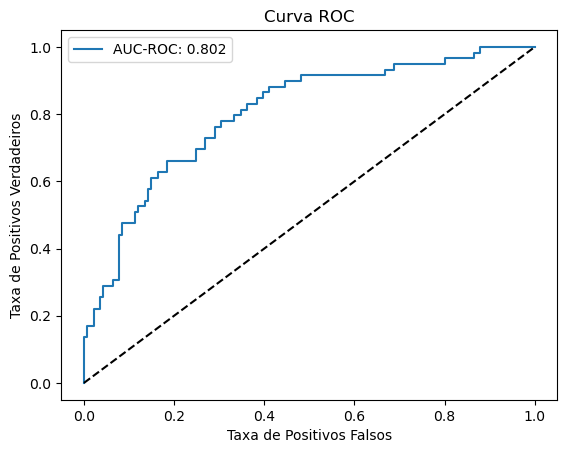

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtenha as probabilidades preditas
y_pred_proba_rf = best_rf.predict_proba(X_test_rf)[:, 1]

# Obtenha as labels verdadeiras
y_test_label_rf = y_test_rf.values

# Plote a curva ROC
fpr, tpr, thresholds = roc_curve(y_test_label_rf, y_pred_proba_rf)

# Curva ROC: plota a Taxa de Positivos Verdadeiros contra a Taxa de 
# Positivos Falsos em diferentes thresholds
auc_rf = roc_auc_score(y_test_label_rf, y_pred_proba_rf)

# AUC-ROC: Área abixo da Curva Roc, representa a capacidade do modelo 
# de distinguir entre classes
# AUC-ROC é a área sob a curva ROC, valores mais altos indicam melhor performance
plt.plot(fpr, tpr, label=f'AUC-ROC: {auc_rf:.3f}')
plt.plot([0, 1], [0, 1], 'k--')

# linha diagonal representa um classificador aleatório
plt.xlabel('Taxa de Positivos Falsos')
plt.ylabel('Taxa de Positivos Verdadeiros')
plt.title('Curva ROC')
plt.legend()
plt.show()

## Gradient Boosting (Revisar e reforçar conhecimento)

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [77]:
# Carregando dados da 2ª aba do arquivo Excel para o DataFrame df
df = pd.read_excel('Base_Inadimplencia.xlsx', sheet_name=1)  # Lendo a segunda aba do arquivo Excel

In [78]:
target = df['Inadimplencia']

In [79]:
# Selecionando variáveis quantitativas (numéricas)
df_quantitativas = df.select_dtypes(include=['number'])

# Selecionando variáveis qualitativas (categóricas) colunas exceto as numéricas
df_qualitativas = df.select_dtypes(exclude=['number'])


In [80]:
# Criando variáveis dummy para as variáveis qualitativas
df_final = pd.get_dummies(df, columns=df_qualitativas.columns, drop_first=True)

In [81]:
from sklearn.model_selection import train_test_split

X = df_final.drop('Inadimplencia', axis=1)  # Features
y = df_final['Inadimplencia']  # Target

X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
import time

param_grid_gb = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Define the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()

start_time_gb = time.time()

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='roc_auc')
grid_search.fit(X_train_gb, y_train_gb)

end_time_gb = time.time()

# Calculate the elapsed time GB
elapsed_time_gb = end_time_gb - start_time_gb

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print("Time taken:", elapsed_time_gb, "seconds")

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.7565196095330025
Time taken: 223.93805646896362 seconds


In [83]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = grid_search.best_estimator_
gb_model.fit(X_train_gb, y_train_gb)

## OBS: Os parametros que NÃO apareceram abaixo é que já são padrão do Gradient Boosting

GradientBoostingClassifier(learning_rate=0.01, max_depth=5)

In [84]:
# Imprime o título das métricas
print('\nMétricas do Gradient Boosting:')

# Calcula as métricas para o modelo de Regressão Logística
# Passa o modelo, dados de treinamento e teste, e variáveis target
metricas_gb = calcula_desempenho(
	gb_model, 
	X_train_gb, 
	y_train_gb, 
	X_test_gb, 
	y_test_gb
)

# Formata a exibição de números flutuantes em DataFrames do pandas
# Mostra como porcentagem com 2 casas decimais
pd.options.display.float_format = '{:.2f}%'.format

# Exibe as métricas calculadas
metricas_gb


Métricas do Gradient Boosting:


,Treino,Teste,Diferença
Acurácia,81.25%,75.00%,-6.25%
AUROC,90.08%,78.10%,-11.98%
KS,65.82%,47.55%,-18.27%
Precision,95.96%,80.00%,-15.96%
Recall,39.42%,20.34%,-19.08%
F1,55.88%,32.43%,-23.45%


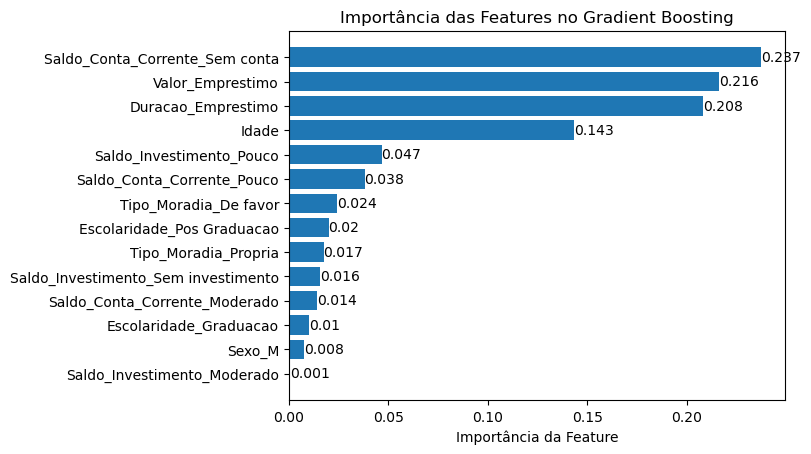

In [85]:
# Obtenha as importâncias das features do modelo Gradient Boosting
feat_importances_gb = gb_model.feature_importances_
# Obtenha os nomes das features
feat_names_gb = X_train_gb.columns

# Ordene as importâncias das features em ordem decrescente
sorted_indices_gb = feat_importances_gb.argsort()
feat_importances_gb = feat_importances_gb[sorted_indices_gb]
feat_names_gb = feat_names_gb[sorted_indices_gb]

# Tamanho no gráfico
#plt.figure(figsize=(12, 8))  

# Plote o gráfico de barras horizontais com as importâncias das features
plt.barh(range(len(feat_names_gb)), feat_importances_gb)
# Adicione os nomes das features no eixo y
plt.yticks(range(len(feat_names_gb)), feat_names_gb)
# Adicione o rótulo do eixo x
plt.xlabel('Importância da Feature')
# Adicione o título do gráfico
plt.title('Importância das Features no Gradient Boosting')

# Adicione os valores de importância das features como rótulos no gráfico
for i, importance in enumerate(feat_importances_gb):
	plt.text(importance, i, str(importance.round(3)), ha='left', va='center')

# Exibe o gráfico
plt.show()

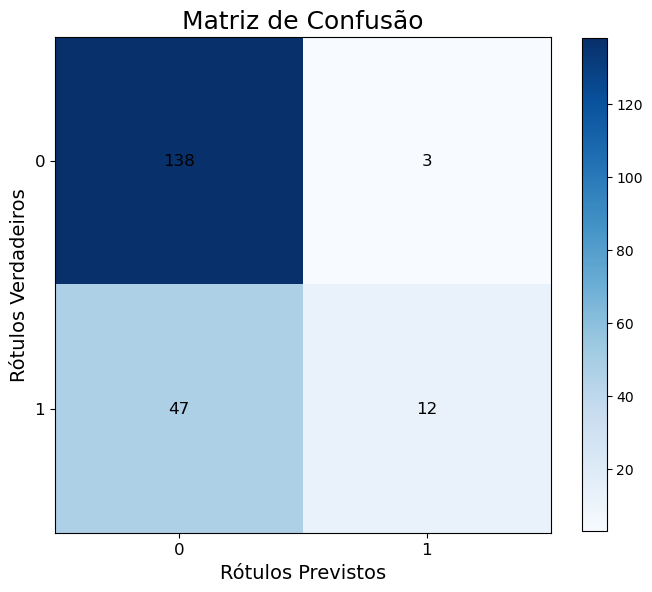

In [86]:
from sklearn.metrics import confusion_matrix

# Calcule a matriz de confusão
cm_gb = confusion_matrix(y_test_gb, gb_model.predict(X_test_gb))

# Crie um objeto figura e eixo
fig, ax = plt.subplots(figsize=(8, 8))

# Plote a matriz de confusão como uma imagem
ax.imshow(cm_gb, interpolation='nearest', cmap='Blues')

# Adicione um título e labels
ax.set_title('Matriz de Confusão', fontsize=18)
ax.set_xlabel('Rótulos Previstos', fontsize=14)
ax.set_ylabel('Rótulos Verdadeiros', fontsize=14)

# Adicione marcas de tick e labels para os eixos x e y
marcas_de_tick = np.arange(len(np.unique(y_test_gb)))
ax.set_xticks(marcas_de_tick)
ax.set_yticks(marcas_de_tick)
ax.set_xticklabels(np.unique(y_test_gb), fontsize=12)
ax.set_yticklabels(np.unique(y_test_gb), fontsize=12)

# Adicione os valores à matriz de confusão
for i, j in np.ndindex(cm_gb.shape):
	ax.text(j, i, cm_gb[i, j], ha='center', va='center', color='black', fontsize=12)

# Adicione uma barra de cores
fig.colorbar(ax.imshow(cm_gb, interpolation='nearest', cmap='Blues'), ax=ax, shrink=0.8)

# Mostre o plot
plt.show()

In [87]:
# Imprime a explicação da matriz de confusão Gradient Boosting (_gb)
print(explicar_matriz_confusao(cm_gb))

Explicação da Matriz de Confusão:

A matriz de confusão mostra como nosso modelo previu os resultados reais.
Aqui está o que cada número significa:

Verdadeiros Positivos (VP): 138 - Estes são os casos em que nosso modelo previu corretamente um resultado positivo (ex.: real positivo e previsto positivo).
Verdadeiros Negativos (VN): 12 - Estes são os casos em que nosso modelo previu corretamente um resultado negativo (ex.: real negativo e previsto negativo).
Falsos Positivos (FP): 3 - Estes são os casos em que nosso modelo previu incorretamente um resultado positivo (ex.: real negativo mas previsto positivo).
Falsos Negativos (FN): 47 - Estes são os casos em que nosso modelo previu incorretamente um resultado negativo (ex.: real positivo mas previsto negativo).



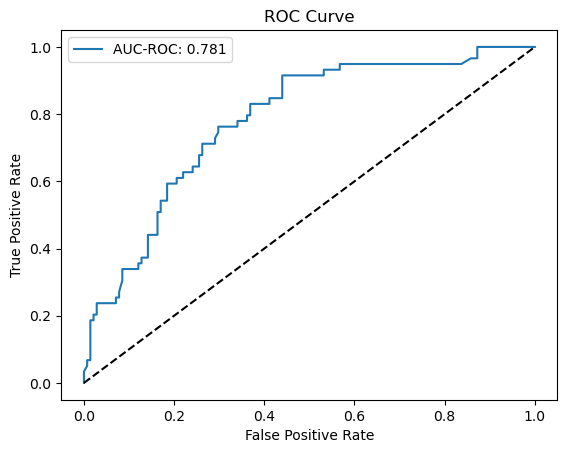

In [88]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities
y_pred_proba_gb = gb_model.predict_proba(X_test_gb)[:, 1]

# Get the true labels
y_test_label_gb = y_test_gb.values

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_label_gb, y_pred_proba_gb)

# Calculate the AUROC score
auc_gb = roc_auc_score(y_test_label_gb, y_pred_proba_gb)

# Plot the ROC curve with the AUROC score
plt.plot(fpr, tpr, label=f'AUC-ROC: {auc_gb:.3f}')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line for a random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Redes Neurais (Estudar e aprofundar mais)

In [117]:
import tensorflow as tf

In [118]:
from sklearn.preprocessing import OneHotEncoder

In [119]:
# Carregando dados da 2ª aba do arquivo Excel para o DataFrame df
df = pd.read_excel('Base_Inadimplencia.xlsx', sheet_name=1)  # Lendo a segunda aba do arquivo Excel

In [120]:
target = df['Inadimplencia']

In [121]:
# Selecionando variáveis quantitativas (numéricas)
df_quantitativas = df.select_dtypes(include=['number'])

# Selecionando variáveis qualitativas (categóricas) colunas exceto as numéricas
df_qualitativas = df.select_dtypes(exclude=['number'])

In [122]:
# One-hot encoding para as variáveis qualitativas
encoder = OneHotEncoder(handle_unknown='ignore')
X_qualitativas_encoded = encoder.fit_transform(df_qualitativas)

# Concatenando as variáveis quantitativas e qualitativas codificadas
X_final = np.concatenate((df_quantitativas, X_qualitativas_encoded.toarray()), axis=1)

In [123]:
from sklearn.model_selection import train_test_split

# Concatenando as variáveis quantitativas e qualitativas codificadas
X_final = np.concatenate((df_quantitativas, X_qualitativas_encoded.toarray()), axis=1)
y = df['Inadimplencia']  # Target

X_train_rn, X_test_rn, y_train_rn, y_test_rn = train_test_split(X_final, y, test_size=0.2, random_state=777)

In [124]:
# Criando a rede neural
rn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_final.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [125]:
# Compilando a rede neural
rn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics='AUC')

In [126]:
# Treinando a rede neural
rn_model.fit(X_train_rn, y_train_rn, epochs=10, batch_size=32, validation_data=(X_test_rn, y_test_rn))

Epoch 1/10
25/25 [==============================] - 1s 10ms/step - loss: 87.1935 - auc: 0.4926 - val_loss: 13.9829 - val_auc: 0.5000
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 11.4453 - auc: 0.5175 - val_loss: 2.5611 - val_auc: 0.5181
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 2.0110 - auc: 0.5417 - val_loss: 1.5496 - val_auc: 0.5374
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 1.0461 - auc: 0.5650 - val_loss: 1.4577 - val_auc: 0.5714
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 1.5683 - auc: 0.5615 - val_loss: 2.0672 - val_auc: 0.5626
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 1.4961 - auc: 0.5481 - val_loss: 1.0569 - val_auc: 0.5869
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 1.5830 - auc: 0.5843 - val_loss: 0.9622 - val_auc: 0.5941
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 0.9067 - auc: 

In [133]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

# Predictions on training and test sets
y_pred_train = rn_model.predict(X_train_rn)
y_pred_test = rn_model.predict(X_test_rn)

# Convert predictions to binary values (0 or 1)
y_pred_train_binary = (y_pred_train > 0.5).astype(int)
y_pred_test_binary = (y_pred_test > 0.5).astype(int)

# Calculate metrics
accuracy_train = accuracy_score(y_train_rn, y_pred_train_binary)
accuracy_test = accuracy_score(y_test_rn, y_pred_test_binary)

auroc_train = roc_auc_score(y_train_rn, y_pred_train)
auroc_test = roc_auc_score(y_test_rn, y_pred_test)

precision_train = precision_score(y_train_rn, y_pred_train_binary, zero_division=1)
precision_test = precision_score(y_test_rn, y_pred_test_binary, zero_division=1)

recall_train = recall_score(y_train_rn, y_pred_train_binary)
recall_test = recall_score(y_test_rn, y_pred_test_binary)

f1_train = f1_score(y_train_rn, y_pred_train_binary)
f1_test = f1_score(y_test_rn, y_pred_test_binary)

In [134]:
# Create a dictionary to store the metrics
metrics_dict = {
    'Metric': ['Acurácia', 'AUROC', 'Precisão', 'Recall', 'F1'],
    'Treino': [accuracy_train * 100, auroc_train * 100, precision_train * 100, recall_train * 100, f1_train * 100],
    'Teste': [accuracy_test * 100, auroc_test * 100, precision_test * 100, recall_test * 100, f1_test * 100],
    'Diferença': [(accuracy_train - accuracy_test) * 100, (auroc_train - auroc_test) * 100, (precision_train - precision_test) * 100, (recall_train - recall_test) * 100, (f1_train - f1_test) * 100]
}

# Create a DataFrame from the dictionary
metric_rn = pd.DataFrame(metrics_dict)

# Display the DataFrame
print("Métricas do Rede Neural:")
display(metric_rn)

Métricas do Rede Neural:


,Metric,Treino,Teste,Diferença
0,Acurácia,69.12%,73.50%,-4.37%
1,AUROC,58.89%,59.25%,-0.36%
2,Precisão,100.00%,100.00%,0.00%
3,Recall,0.00%,0.00%,0.00%
4,F1,0.00%,0.00%,0.00%
